#Download necessary pkgs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 831.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 607.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 589.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 825.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 726.9 kB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=b425a1fde0afee6f327960c513fdfe8f24ec36e6a346e243d0ddfd2a1a0e06ed
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
import scanpy as sc
import anndata as ad
import scanpy.external as sce
# import scanorama

ModuleNotFoundError: No module named 'scanpy'

In [ ]:
%%time
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.sparse import vstack, csr_matrix, csc_matrix

CPU times: user 626 ms, sys: 53 ms, total: 679 ms
Wall time: 420 ms


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/scanorama_demo/CRCData/Pseudotime data/p5subcell_counts1.csv')

In [ ]:
data = data.set_index('Unnamed: 0')

In [ ]:
data = data.iloc[[1,2,5]]

In [ ]:
data = data.T

In [ ]:
data.iloc[30:40]

X0  X1  X2  X3   X4  X5   X6   X7   X8   X9   X10  X11
Unnamed: 0                                                              
c31_DNT            0  19  23   8   35  17   34   50   76   40   159   14
c32_DPT            0  29  59  56  143  73   36   11    6    7    25   14
c33_ILC_GZMK       1  11   8  24   17   6   84   76   93   31   191  649
c34_ILC_NR4A2      0  12   2  12    1   2   15    6    2    8     2   11
c35_ILC_FCGR3A     0   3   9   0    5   3  135  291  729  386  1353  141
c36_ILC_SYNE2      0   0   2   1    2   2    3    6   24   12   113    0
c37_ILC_SLC4A10    0   4   0   4    4  23    1    0    0    0     0    2
c38_ILC_MKI67      0   0   0   0    1  13    9   14    4    2     9    0
c39_NaiveB_TCL1A   0   0   0   0    0   0    0    0    0    0     0    0
c40_NaiveB_IGHD    0   0   0   0    0   0    0    0    0    0     0    0

In [ ]:
data['sum'] = data.sum(axis=1)

In [ ]:
data[data.index.str.contains('CD4')]


X0   X1  X2  X3  X4   X5   X6  X7  X8  X9  X10
Unnamed: 0                                                               
c01_CD4_Tn_CCR7             0   64  63  41  29   59   99  17   0   0    0
c02_CD4_Tn_SELL             0   61  46  34  38  152  138   8   0   0    0
c03_CD4_Tn_NR4A2            1   74  45   0   1    3    3   2   2   0    0
c04_CD4_Tcm_ANXA1           2   96  75  62  42  186   72  16   1   0    0
c05_CD4_Tcm_GPR183          0  384  74   5   0    3    1   3   2   0    0
c06_CD4_Trm_HSPA1A          0   49  48  17   3    2   15   9   4   0    0
c07_CD4_Th17_CTSH           0   66  35   0   0    0    0   1   1   0    0
c08_CD4_Tfh_CXCL13_IL6ST    0    9   6   0   0    1    0   0   0   0    0
c09_CD4_Th1_CXCL13_HAVCR2   0    7   5   1   1    0    1   2   2   0    0
c10_CD4_Temra_GZMB          0   19  31  28  12   55   20   4   0   2    0
c11_CD4_Treg_FOXP3          0    8  24  10  10   19   27  35   5   0    0
c12_CD4_Treg_KLRB1          0  167  74   3   0    8    0   4  10   0    0
c13_CD4_Treg_TNFRSF9        0  123  18   0   0    1    1   0   2   0    0
c14_CD4_MT                  0   19  66  24  15   64   12  24  79   0    0

In [ ]:
data = data.iloc[[2, 1, 0]].T

In [ ]:
data = data.astype(float)

In [ ]:
data = data[data.sum(axis=1) >= 30]

In [ ]:
data[data.index.str.contains('Coloncyte')]

0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
c84_Coloncyte_CA2         0   132    13    14     4    17    36    13     5   
c85_Coloncyte_SLC26A3     0     0     0     0     0     0     0     1     0   
c86_Coloncyte_BEST4       0    11     2     1     0     1     7     1     0   

                       9.0   ...  14.0  15.0  16.0  17.0  18.0  19.0  20.0  \
c84_Coloncyte_CA2        17  ...    45   102   224   374   183    26    11   
c85_Coloncyte_SLC26A3     0  ...     0     0     1     1    15     0     0   
c86_Coloncyte_BEST4       2  ...     4     4     8    14    21     0     0   

                       21.0  22.0  23.0  
c84_Coloncyte_CA2         0    45   151  
c85_Coloncyte_SLC26A3     0     8     0  
c86_Coloncyte_BEST4       0     0     0  

[3 rows x 24 columns]

In [ ]:
cd4_rows = data[data.index.str.contains('CD4')]
cd8_rows = data[data.index.str.contains('CD8')]
coloncyte_rows = data[data.index.str.contains('Coloncyte')]


cd_sum = pd.DataFrame({
                        'CD4' : cd4_rows.sum(),
                        'ILC': data.iloc[35],
                        'Epi' : data.loc['c91_Epi_Tumor'] + data.loc['c90_Epi_MKI67'],
                        'CD8' : cd8_rows.sum(),

                      #  'coloncyte' : coloncyte_rows.sum(),
                      })
# c91 = pd.DataFrame({

# })

# data = pd.DataFrame({
#     'others' : cd_sum.T.sum(),
#     'c91' : c91.iloc[:, 0]
# })
data = cd_sum

In [ ]:
data = data.iloc[[19, 21, 23]]

In [ ]:
data = data.iloc[[0, 3, 13]]

In [ ]:
data = data.iloc[[85, 86]]

In [ ]:
data.iloc[5, 1] = 14

In [ ]:
cd_sum['year'] = np.linspace(0, 5, 15)

In [ ]:
data = cd_sum

In [ ]:
data = data.iloc[:-1]

In [ ]:
data['year'] = np.linspace(0, 5, 12)

In [ ]:
data = np.log1p(data)

In [ ]:
data = data.iloc[:-2]

[15.77259091  2.80819761  0.39953886  0.09044089  3.47061792  5.27982727]


Text(0.05, 1, 'A')

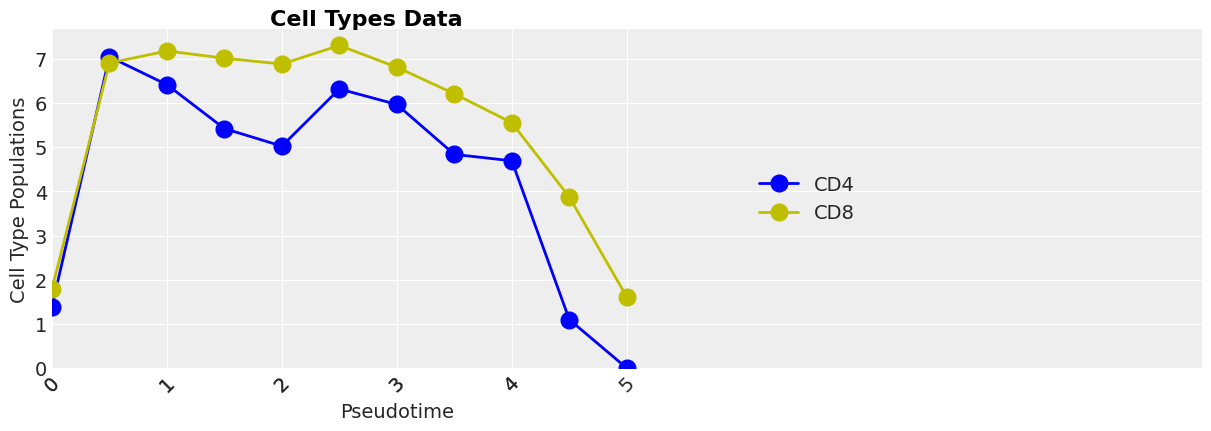

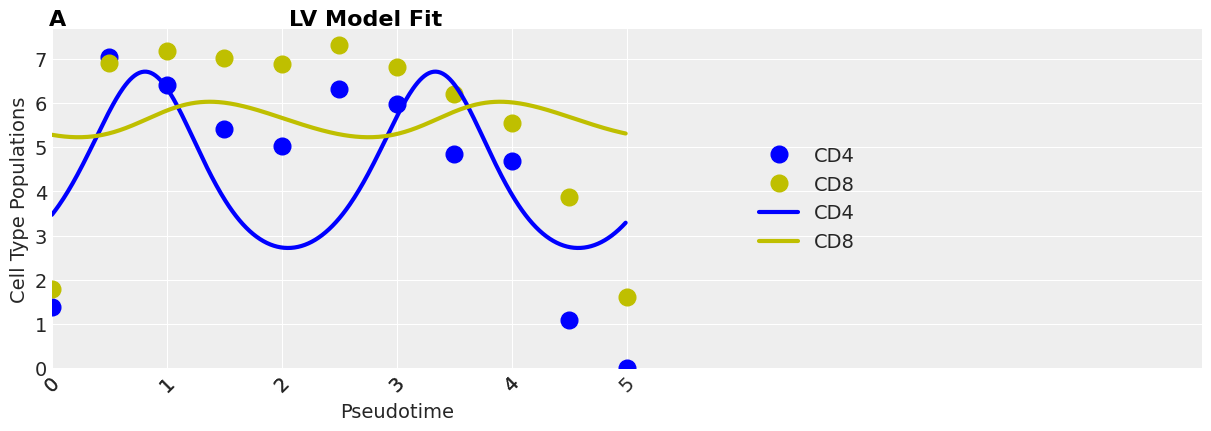

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor
import pytensor.tensor as pt
import random

from numba import njit
from pymc.ode import DifferentialEquation
from pytensor.compile.ops import as_op
from scipy.integrate import odeint
from scipy.optimize import least_squares

pytensor.config.floatX = 'float64'
pd.set_option('display.precision', 10)
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)
time = np.arange(0, 5, 0.01)


def plot_data(ax, fig, lw=2, title="Cell Types Data"):
    ax.plot(data.year, data.iloc[:, 0], color='b', lw=lw, marker="o", markersize=12, label=data.columns[0])
    ax.plot(data.year, data.iloc[:, 1], color='y', lw=lw, marker="o", markersize=12, label=data.columns[1])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

_, ax = plt.subplots(figsize=(12, 4))
plot_data(ax, _);

@njit
def lotka_volterra(X, t, theta):
    x, y = X
    alpha, beta, gamma, delta, xt0, yt0 = theta
    dx_dt = alpha * x - beta * x * y
    dy_dt = -gamma * y + delta * x * y
    return [dx_dt, dy_dt]

def plot_model(ax, fig, x_y, time=time, alpha=1, lw=3, title="Lotka-Volterra Model",):
    ax.plot(data.year, data.iloc[:, 0], color='b', lw=0, marker="o", markersize=12, label=data.columns[0])
    ax.plot(data.year, data.iloc[:, 1], color='y', lw=0, marker="o", markersize=12, label=data.columns[1])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.plot(time, x_y[:, 0], color='b', alpha=alpha, lw=lw, label=data.columns[0])
    ax.plot(time, x_y[:, 1], color='y', alpha=alpha, lw=lw, label=data.columns[1])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

theta = np.array([15.25, 2.76, 0.24, 0.06, 4, 5.27])


def ode_model_resid(theta):
    return (
        data.iloc[:, [0, 1]] - odeint(func=lotka_volterra, y0=theta[-2:], t=data.year, args=(theta,))
    ).values.flatten()
lower_bound = [0] * len(theta)
upper_bound = [np.inf] * len(theta)
results = least_squares(ode_model_resid, x0=theta, bounds = (lower_bound, upper_bound))

theta = results.x
print(theta)
x_y = odeint(func=lotka_volterra, y0=theta[-2:], t=time, args=(theta,))
fig, ax = plt.subplots(figsize=(12, 4))
plot_model(ax, fig, x_y, title="LV Model Fit");
fig.text(0.05, 1, "A", ha='right', fontsize=16, color='black', fontweight='bold')



# @as_op(itypes=[pt.dvector], otypes=[pt.dmatrix])
# def pytensor_forward_model_matrix(theta):
#     return odeint(func=lotka_volterra, y0=theta[-2:], t=data.year, args=(theta,))

# theta = results.x
# with pm.Model() as model:
#     means = [theta[0], theta[1], theta[2], theta[3], theta[4], theta[5]]
#     alpha = pm.TruncatedNormal("alpha", mu=means[0], sigma=0.1, lower= means[0] - 0.001, upper = means[0] + 0.001, initval=means[0])
#     beta = pm.TruncatedNormal("beta", mu=means[1], sigma=0.01, lower= means[1] - 0.001, upper = means[1] + 0.001, initval=means[1])
#     gamma = pm.TruncatedNormal("gamma", mu=means[2], sigma=0.1, lower= means[2] - 0.001, upper = means[2] + 0.001, initval=means[2])
#     delta = pm.TruncatedNormal("delta", mu=theta[3], sigma=0.01, lower= theta[3]-0.001, upper = theta[3]+0.001, initval=theta[3])
#     xt0 = pm.TruncatedNormal("xto", mu=means[4], sigma=1, lower= means[4] - 0.001 , upper = means[4] + 0.001, initval=means[4])
#     yt0 = pm.TruncatedNormal("yto", mu=means[5], sigma=1, lower= means[5] - 0.001, upper = means[5] + 0.001, initval=means[5])
#     sigma = pm.HalfNormal("sigma", 10)

#     ode_solution = pytensor_forward_model_matrix(
#         pm.math.stack([alpha, beta, gamma, delta, xt0, yt0])
#     )

#     pm.Normal("Y_obs", mu=ode_solution, sigma=sigma, observed=data.iloc[:, [0, 1]].values)

# vars_list = list(model.values_to_rvs.keys())[:-1]

# sampler = "Slice Sampler"
# tune = draws = 200

# with model:
#     trace_slice = pm.sample(step=[pm.Slice(vars_list)], tune=tune, draws=draws)

# trace = trace_slice
# az.summary(trace)

[13.49509904  3.6586534   0.4390036   0.09858681  3.5857512   3.4592086 ]


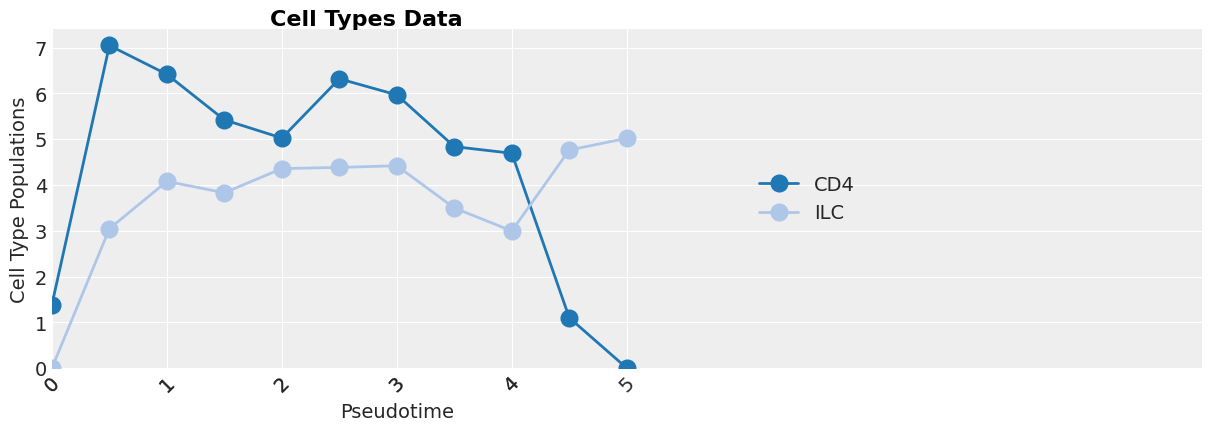

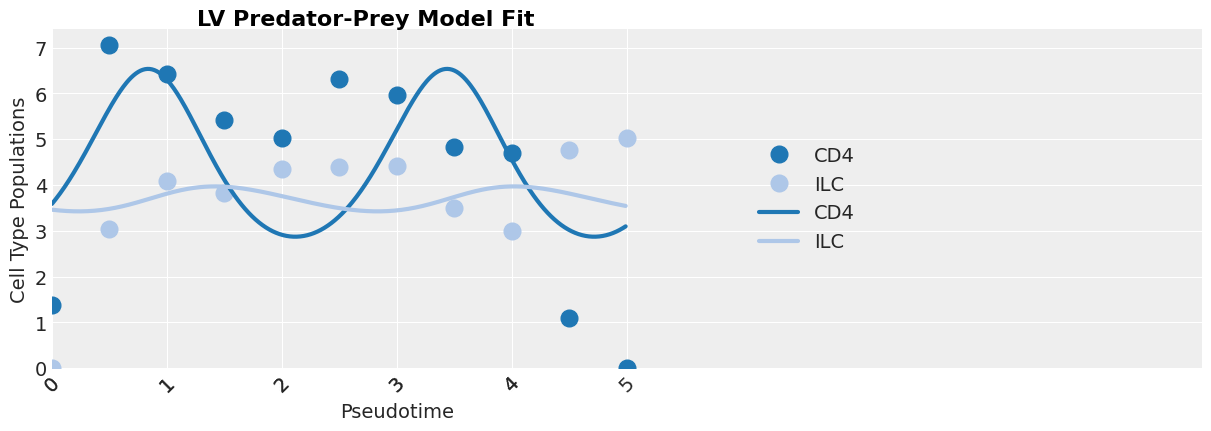

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor
import pytensor.tensor as pt
import random

from numba import njit
from pymc.ode import DifferentialEquation
from pytensor.compile.ops import as_op
from scipy.integrate import odeint
from scipy.optimize import least_squares

pytensor.config.floatX = 'float64'
pd.set_option('display.precision', 10)
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)
time = np.arange(0, 5, 0.01)


def plot_data(ax, fig, lw=2, title="Cell Types Data"):
    ax.plot(data.year, data.iloc[:, 0], color=color[0], lw=lw, marker="o", markersize=12, label=data.columns[0])
    ax.plot(data.year, data.iloc[:, 1], color=color[1], lw=lw, marker="o", markersize=12, label=data.columns[1])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

_, ax = plt.subplots(figsize=(12, 4))
plot_data(ax, _);

@njit
def lotka_volterra(X, t, theta):
    x, y = X
    alpha, beta, gamma, delta, xt0, yt0 = theta
    dx_dt = alpha * x - beta * x * y
    dy_dt = -gamma * y + delta * x * y
    return [dx_dt, dy_dt]

def plot_model(ax, fig, x_y, time=time, alpha=1, lw=3, title="Lotka-Volterra Model",):
    ax.plot(data.year, data.iloc[:, 0], color=color[0], lw=0, marker="o", markersize=12, label=data.columns[0])
    ax.plot(data.year, data.iloc[:, 1], color=color[1], lw=0, marker="o", markersize=12, label=data.columns[1])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.plot(time, x_y[:, 0], color=color[0], alpha=alpha, lw=lw, label=data.columns[0])
    ax.plot(time, x_y[:, 1], color=color[1], alpha=alpha, lw=lw, label=data.columns[1])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

theta = np.array([15.25, 2.76, 0.24, 0.06, 4, 5.27])


def ode_model_resid(theta):
    return (
        data.iloc[:, [0, 1]] - odeint(func=lotka_volterra, y0=theta[-2:], t=data.year, args=(theta,))
    ).values.flatten()
lower_bound = [0] * len(theta)
upper_bound = [np.inf] * len(theta)
results = least_squares(ode_model_resid, x0=theta, bounds = (lower_bound, upper_bound))

theta = results.x
print(theta)
x_y = odeint(func=lotka_volterra, y0=theta[-2:], t=time, args=(theta,))
fig, ax = plt.subplots(figsize=(12, 4))
plot_model(ax, fig, x_y, title="LV Predator-Prey Model Fit");



# @as_op(itypes=[pt.dvector], otypes=[pt.dmatrix])
# def pytensor_forward_model_matrix(theta):
#     return odeint(func=lotka_volterra, y0=theta[-2:], t=data.year, args=(theta,))

# with pm.Model() as model:
#     means = theta
#     alpha = pm.TruncatedNormal("alpha", mu=means[0], sigma=0.1, lower= 0, initval=means[0])
#     beta = pm.TruncatedNormal("beta", mu=means[1], sigma=0.01, lower= 0, initval=means[1])
#     gamma = pm.TruncatedNormal("gamma", mu=means[2], sigma=0.1, lower= 0, initval=means[2])
#     delta = pm.TruncatedNormal("delta", mu=theta[3], sigma=0.01, lower= 0, initval=theta[3])
#     xt0 = pm.TruncatedNormal("xto", mu=means[4], sigma=1, lower= 0, initval=means[4])
#     yt0 = pm.TruncatedNormal("yto", mu=means[5], sigma=1, lower= 0, initval=means[5])
#     sigma = pm.HalfNormal("sigma", 10)

#     ode_solution = pytensor_forward_model_matrix(
#         pm.math.stack([alpha, beta, gamma, delta, xt0, yt0])
#     )

#     pm.Normal("Y_obs", mu=ode_solution, sigma=sigma, observed=data.iloc[:, [0, 1]].values)

# vars_list = list(model.values_to_rvs.keys())[:-1]

# sampler = "Slice Sampler"
# tune = draws = 200

# with model:
#     trace_slice = pm.sample(step=[pm.Slice(vars_list)], tune=tune, draws=draws)

# trace = trace_slice
# az.summary(trace)

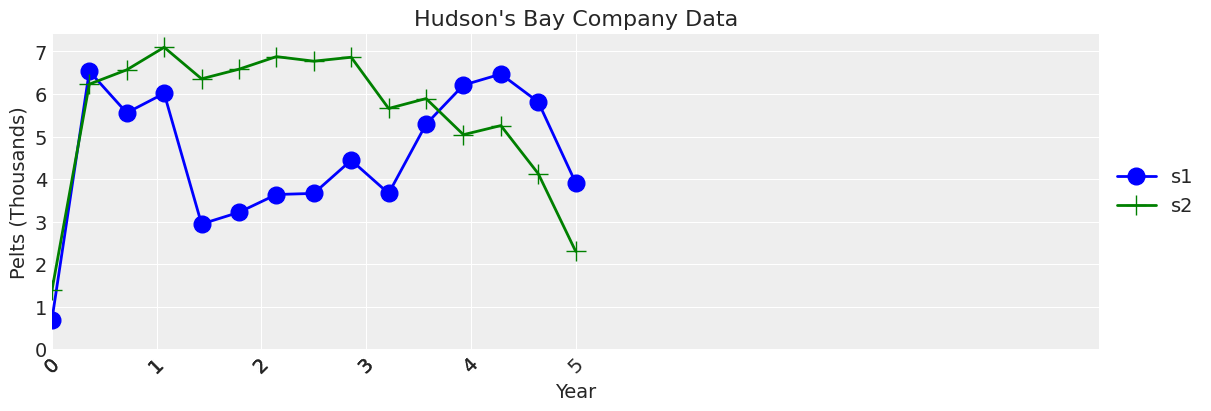

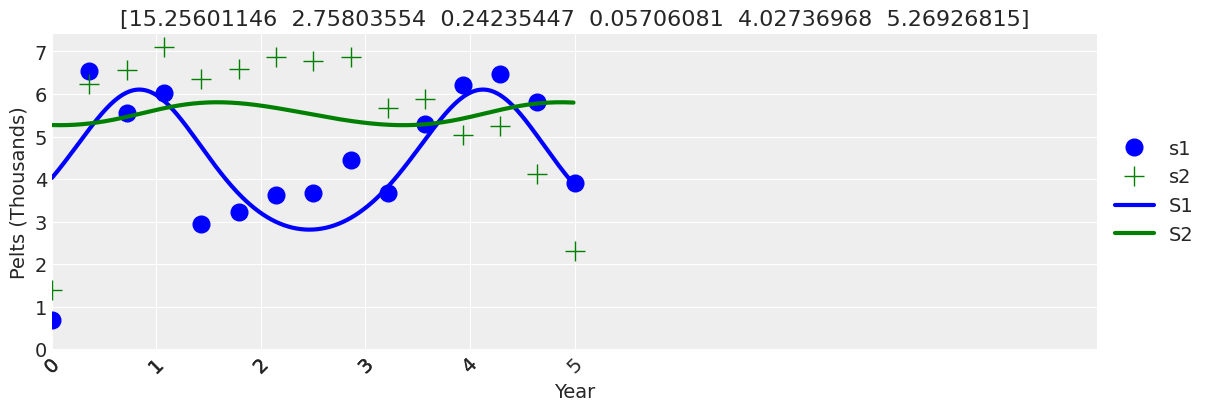

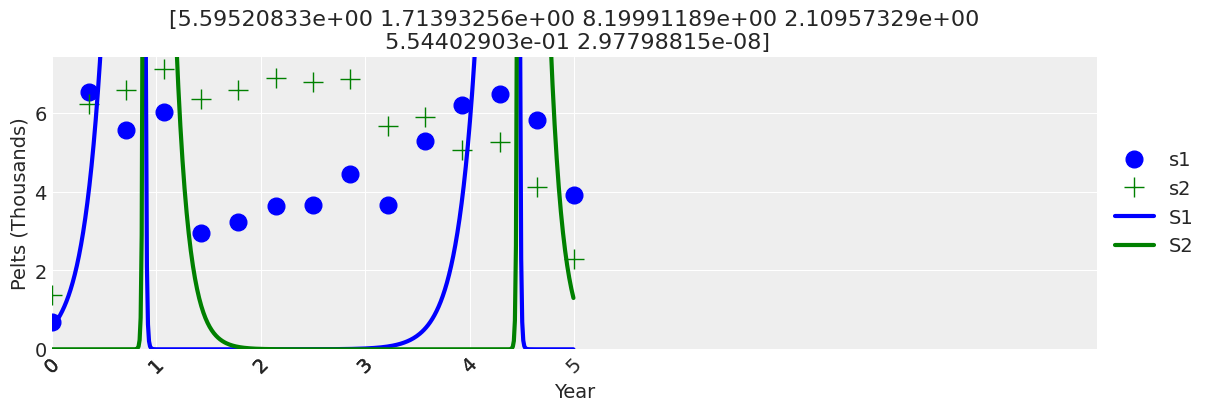

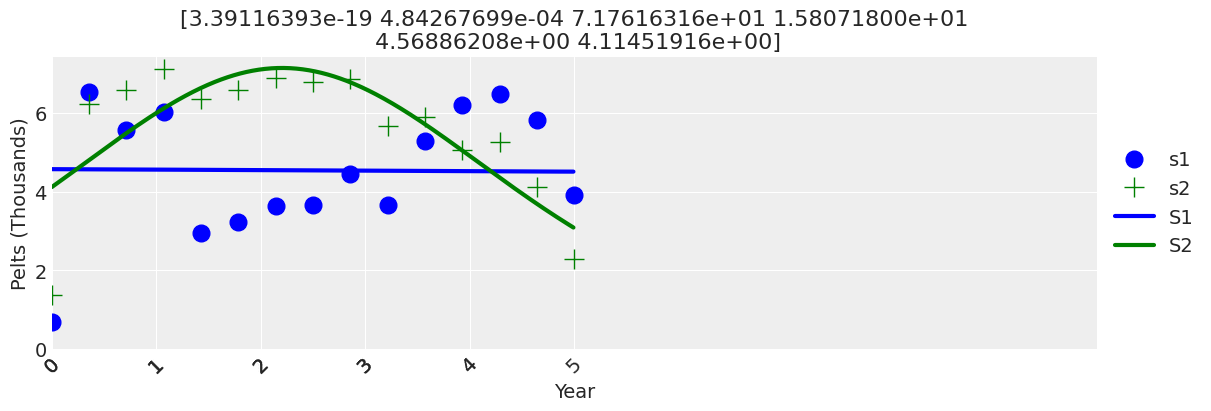

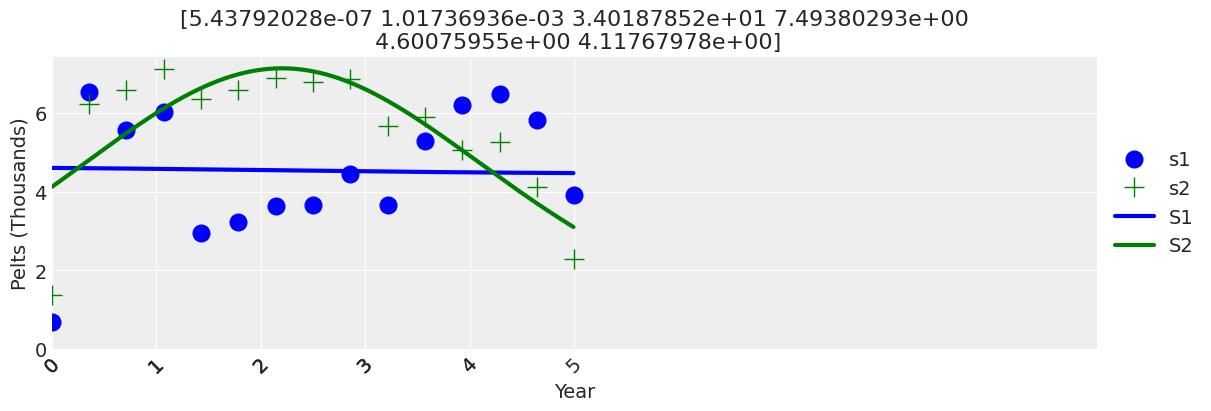

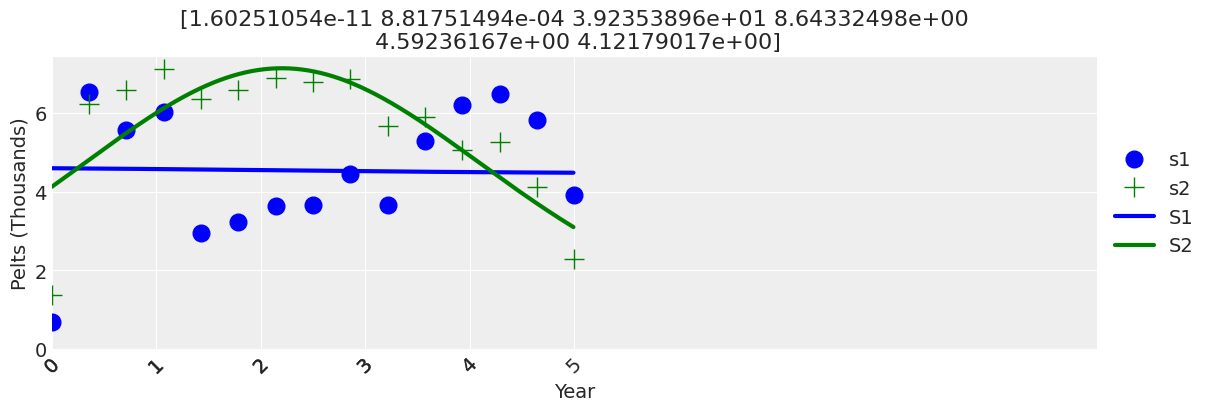

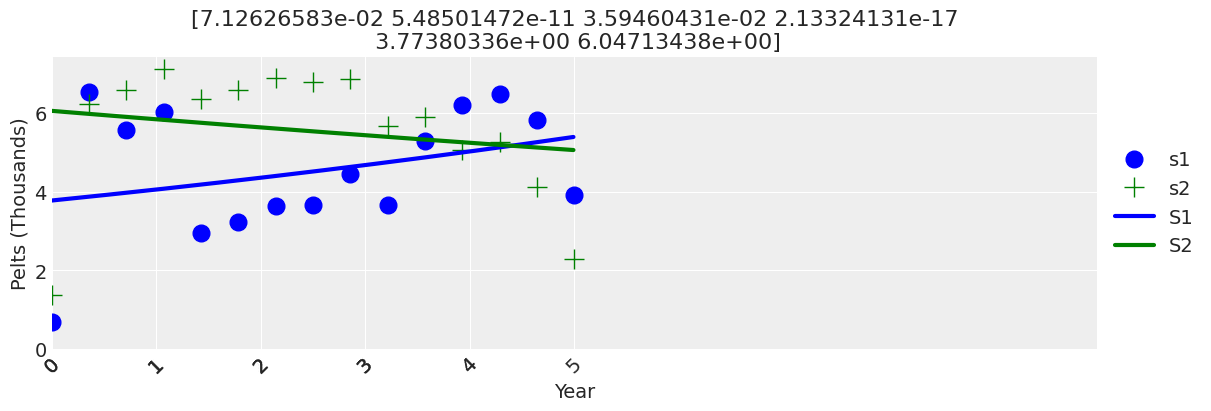

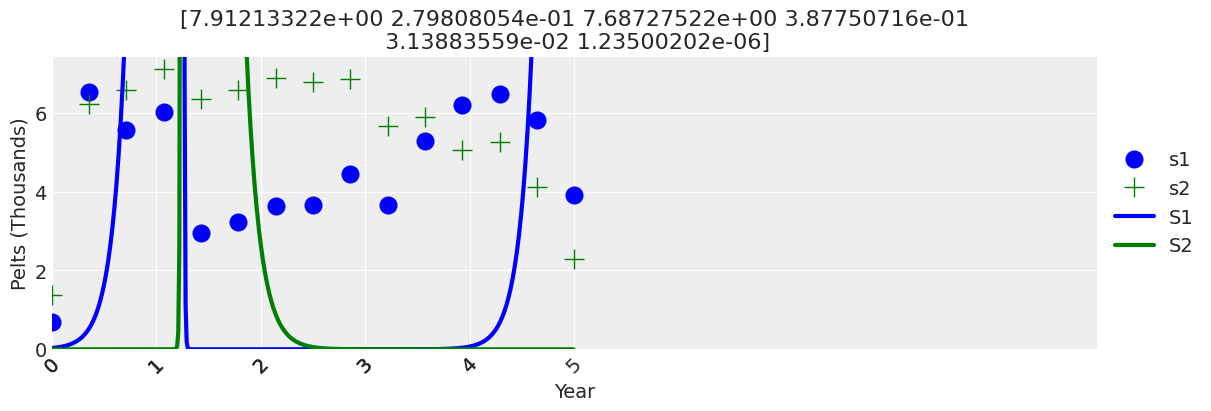

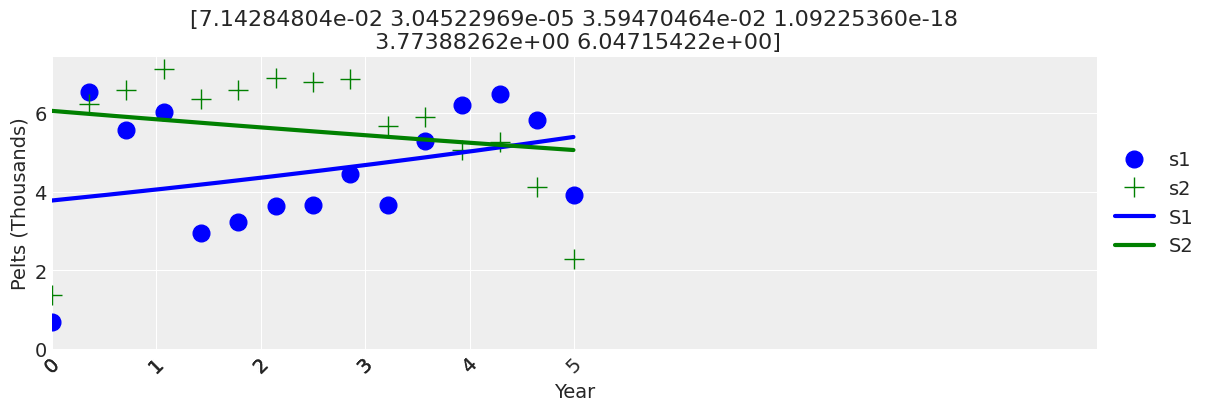

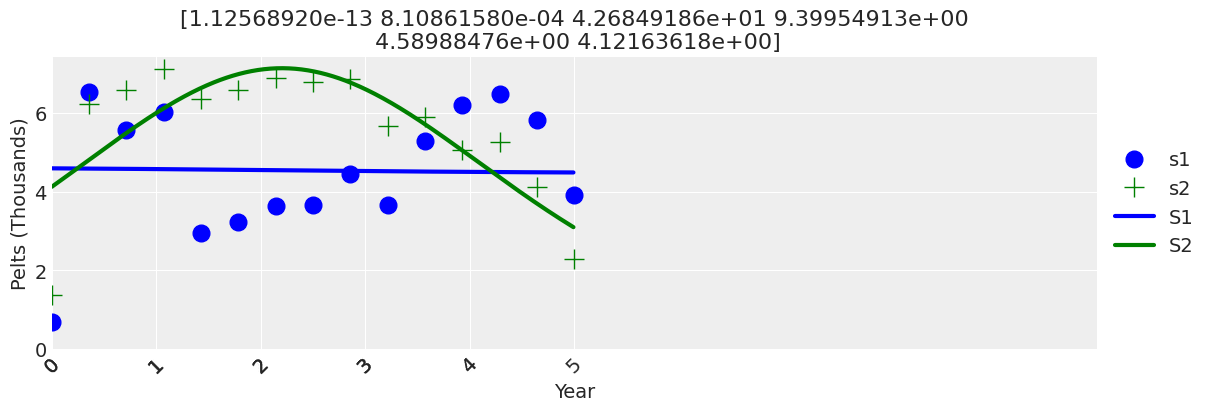

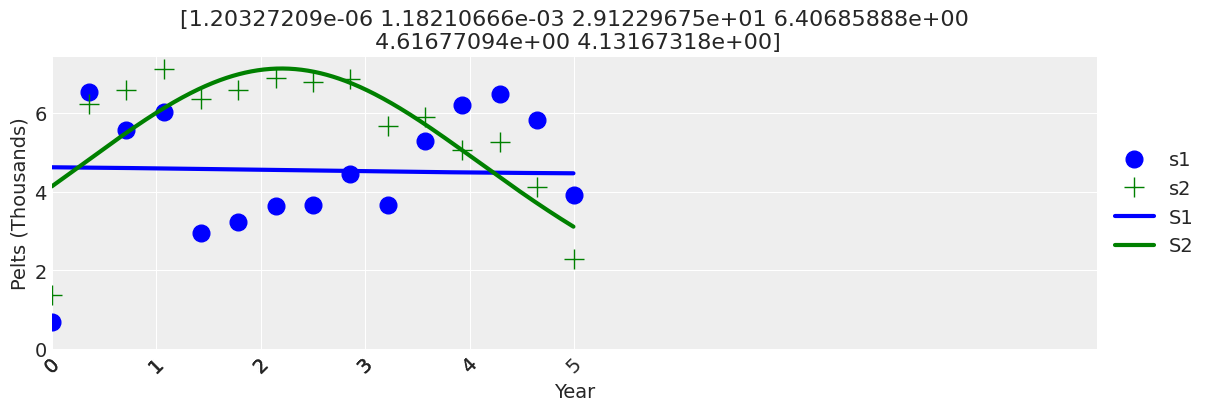

In [ ]:
pytensor.config.floatX = 'float64'
pd.set_option('display.precision', 10)
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)
time = np.arange(0, 5, 0.01)

# data = pd.DataFrame(dict(
#     year = np.arange(1900., 1921., 1),
#     lynx = np.array([4.0, 6.1, 9.8, 35.2, 59.4, 41.7, 19.0, 13.0, 8.3, 9.1, 7.4,
#                 8.0, 12.3, 19.5, 45.7, 51.1, 29.7, 15.8, 9.7, 10.1, 8.6]),
#     hare = np.array([30.0, 47.2, 70.2, 77.4, 36.3, 20.6, 18.1, 21.4, 22.0, 25.4,
#                  27.1, 40.3, 57.0, 76.6, 52.3, 19.5, 11.2, 7.6, 14.6, 16.2, 24.7])))


def plot_data(ax, lw=2, title="Hudson's Bay Company Data"):
    ax.plot(data.year, data.iloc[:, 0], color="b", lw=lw, marker="o", markersize=12, label="s1")
    ax.plot(data.year, data.iloc[:, 1], color="g", lw=lw, marker="+", markersize=14, label="s2")
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(1, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Pelts (Thousands)", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.set_title(title, fontsize=16)
    return ax

_, ax = plt.subplots(figsize=(12, 4))
plot_data(ax);

@njit
def lotka_volterra(X, t, theta):
    x, y = X
    alpha, beta, gamma, delta, xt0, yt0 = theta
    dx_dt = alpha * x - beta * x * y
    dy_dt = -gamma * y + delta * x * y
    return [dx_dt, dy_dt]

def plot_model(
    ax,
    x_y,
    time=time,
    alpha=1,
    lw=3,
    title="Lotka-Volterra Model",
):
    ax.plot(time, x_y[:, 0], color="b", alpha=alpha, lw=lw, label="S1")
    ax.plot(time, x_y[:, 1], color="g", alpha=alpha, lw=lw, label="S2")
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(1, 0.5))
    ax.set_title(title, fontsize=16)
    return ax

for i in range(10):
    theta = np.array([0.85, 0.012, 3.36, 0.0175, 223, 1.12])
    theta = np.array([random.random()*10]*6)
    theta[1] = random.random()/100
    theta[3] = random.random()/10
    theta[4] = random.random()*10
    theta[5] = random.random()*10


    def ode_model_resid(theta):
        return (
            data.iloc[:, [0, 1]] - odeint(func=lotka_volterra, y0=theta[-2:], t=data.year, args=(theta,))
        ).values.flatten()
    lower_bound = [0] * len(theta)
    upper_bound = [np.inf] * len(theta)
    results = least_squares(ode_model_resid, x0=theta, bounds = (lower_bound, upper_bound))

    theta = results.x
    # print(theta)
    x_y = odeint(func=lotka_volterra, y0=theta[-2:], t=time, args=(theta,))
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_data(ax, lw=0)
    plot_model(ax, x_y, title=str(theta));


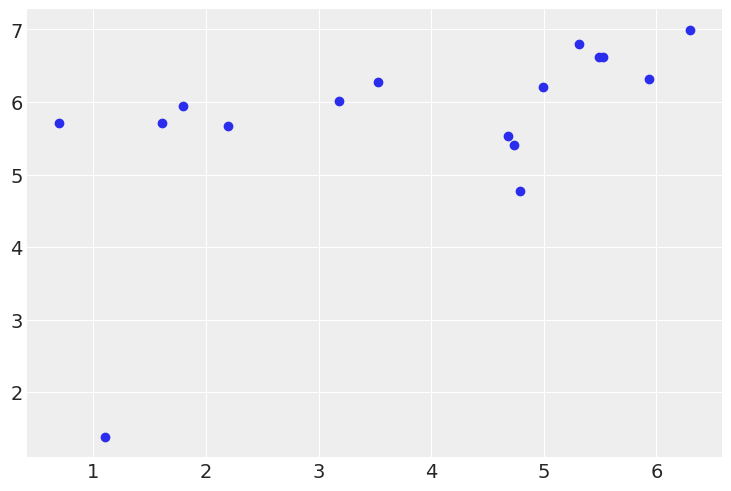

In [ ]:
plt.scatter(data.iloc[:-1, 0], data.iloc[:-1, 1])
plt.show()

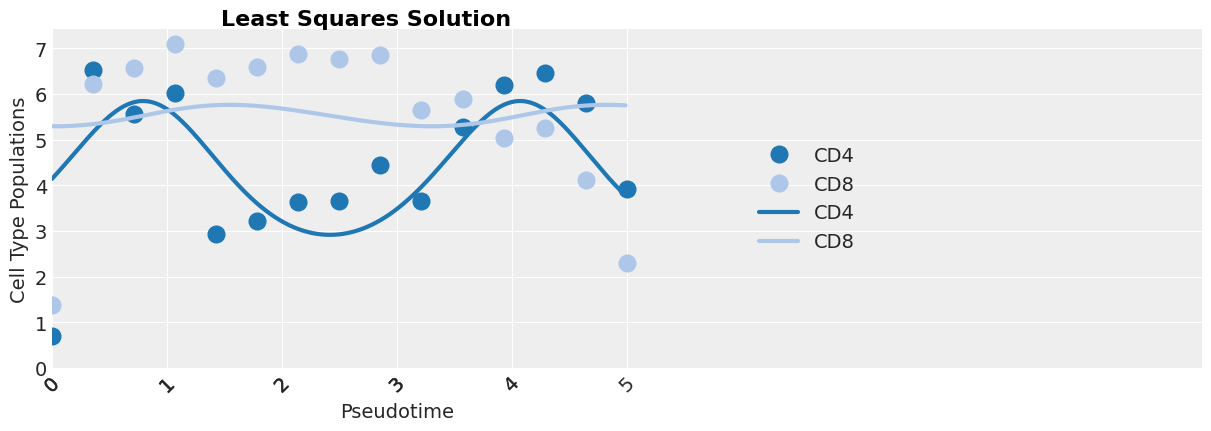

In [ ]:
def get_mean(param):
  return az.summary(trace).loc[param]['mean']
theta = [get_mean('alpha'), get_mean('beta'), get_mean('gamma'), get_mean('delta'), get_mean('xto'), get_mean('yto')]
x_y = odeint(func=lotka_volterra, y0= theta[-2:], t=time, args=(theta,))
f, ax = plt.subplots(figsize=(12, 4))
plot_model(ax, f, x_y, title="Least Squares Solution");

In [ ]:
theta

[1.072, 0.032, 0.573, 0.047, 23.371, 0.001]

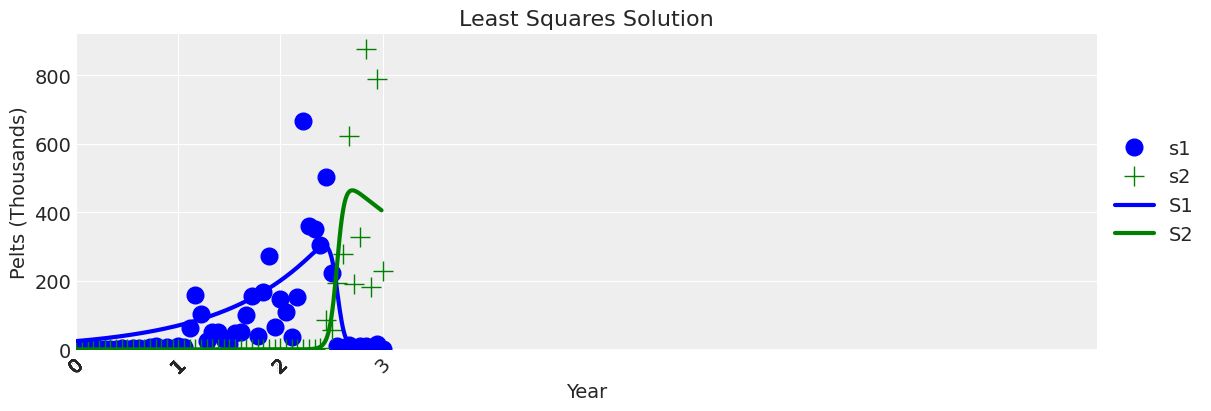

In [ ]:
def get_mean(param):
  return az.summary(trace).loc[param]['mean']

theta = [1.05717553e+00, 5.57727213e-02, 5.48368006e-01, 7.97654337e-02,
 2.42706176e+01, 2.03322507e-08]
x_y = odeint(func=lotka_volterra, y0= theta[-2:], t=time, args=(theta,))
f, ax = plt.subplots(figsize=(12, 4))
plot_data(ax, lw=0)
plot_model(ax, x_y, title="Least Squares Solution");

In [ ]:
[get_mean('alpha'), get_mean('beta'), get_mean('gamma'), get_mean('delta')]

[1.052, 0.045, 0.537, 0.066]

In [ ]:
[get_mean('xto'), get_mean('yto')]

[23.689, 0.0]

In [ ]:
data

1    2     5          year
Unnamed: 0  Epi  ILC     T  0.0000000000
X0            0    1     8  0.3333333333
X1           60  411  1721  0.6666666667
X2           28  417  1409  1.0000000000
X3           49  277  1912  1.3333333333
X4           40  261   801  1.6666666667
X5           83  269   969  2.0000000000
X6          194  422  1452  2.3333333333
X7          346  748  1349  2.6666666667
X8          665  433  1486  3.0000000000
X9          533  401   647  3.3333333333
X10         123  193   620  3.6666666667
X11         241   17   660  4.0000000000
X12          98    1   880  4.3333333333
X13         333    0   399  4.6666666667
X14         304    0    59  5.0000000000

[  4.251  14.816  23.325  10.074  20.861  18.68   10.279   2.666  30.347
  12.244   0.      9.634  16.351  30.06    0.     12.205  12.636  22.319
   2.881  17.513 223.763 277.625 215.306 222.725   2.024   0.056   0.135
   3.007]


Text(0.05, 1, 'B')

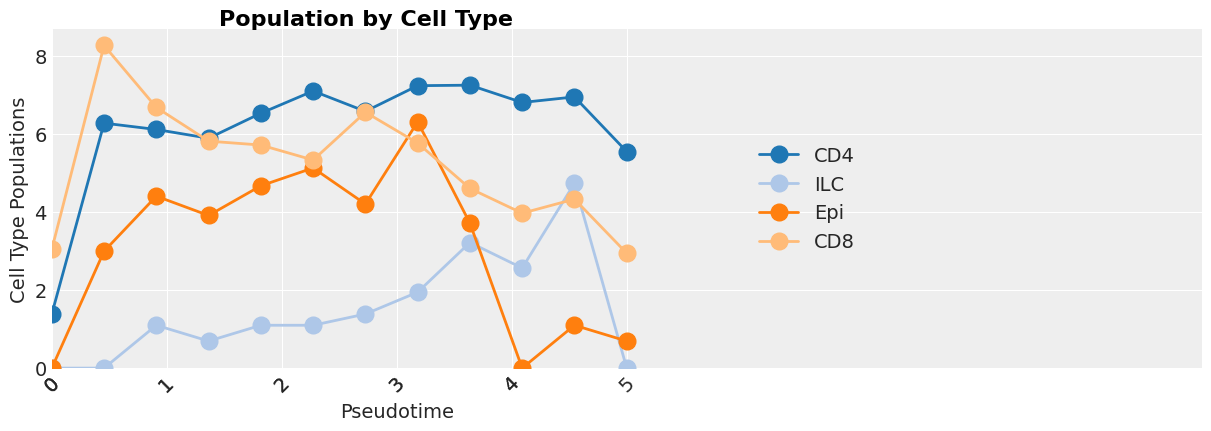

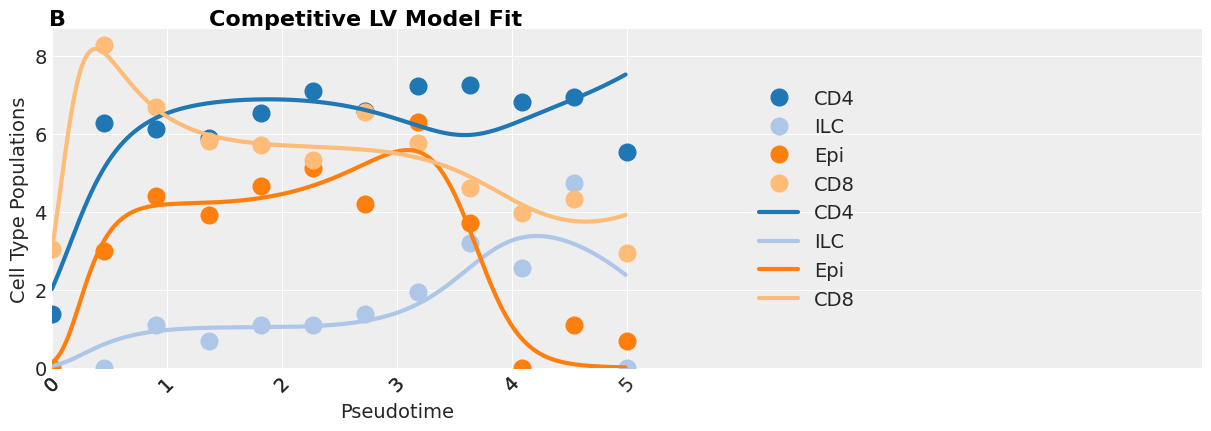

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor
import pytensor.tensor as pt

from numba import njit
from pymc.ode import DifferentialEquation
from pytensor.compile.ops import as_op
from scipy.integrate import odeint
from scipy.optimize import least_squares

#change
species = 4
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)
time = np.arange(0, 5, 0.01)
color = dict(zip(range(species), plt.cm.tab20(range(species))))


def plot_data(ax, fig, lw=2, title="Population by Cell Type"):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=lw, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

_, ax = plt.subplots(figsize=(12, 4))
plot_data(ax, _);

@njit
def lotka_volterra_multi(X, t, theta):
    #change
    species = 4
    dXdt = np.zeros(species)
    r = theta[:species]
    alpha = theta[species:(species + species * species)]
    K = theta[(species + species * species):(2 * species + species * species)]
    for i in range(species):
        interaction_sum = 0.0
        for j in range(species):
            interaction_sum += alpha[i * species + j] * X[j]
        growth = r[i] * X[i] * (1 - (interaction_sum / K[i]))
        dXdt[i] = growth
    return list(dXdt)

def plot_data_notitle(ax, fig, lw=2):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=0, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

def plot_model(ax, fig, x_y, time=time, alpha=1, lw=3, title="Lotka-Volterra Model",):
    for i in range(species):
      ax.plot(time, x_y[:, i], color=color[i], alpha=alpha, lw=lw, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

#change
# X = [7, 2, 1]
# r = [0.2, 0.3, 0.5]
# alpha = [[1, 0.1, 0.1],
#          [0.1, 1, 0.1],
#          [0.1, 0.1, 1]]
# alpha = [item for sublist in alpha for item in sublist]
# K = [200, 200, 200]

X = [3, 3, 3, 3]
r = [0.2, 0.3, 0.3, 0.2]
alpha = [[1, 0.01, 0.01, 0.01],
         [0.01, 1, 0.01, 0.01],
         [0.01, 0.01, 1, 0.01],
         [0.01, 0.01, 0.01, 1]]
alpha = [item for sublist in alpha for item in sublist]
K = [300, 300, 300, 300]

# X = [3, 3, 3, 3, 3]
# r = [0.2, 0.3, 0.3, 0.2, 0.2]
# alpha = [[1, 0.01, 0.01, 0.01, 0.01],
#          [0.01, 1, 0.01, 0.01, 0.01],
#          [0.01, 0.01, 1, 0.01, 0.01],
#          [0.01, 0.01, 0.01, 1, 0.01],
#          [0.01, 0.01, 0.01, 0.01, 1]]
# alpha = [item for sublist in alpha for item in sublist]
# K = [300, 300, 300, 300, 300]

theta = r + alpha + K + X

def ode_model_resid(theta):
    return (
        data.iloc[:, :-1] - odeint(func=lotka_volterra_multi, y0=theta[-species:], t=data.year, args=(theta,))
    ).values.flatten()

lower_bound = [0] * len(theta)
# for i in range(species):
#   lower_bound[(i+1) * species + i] = 0.999999
upper_bound = [np.inf] * len(theta)
# for i in range(species):
#   upper_bound[(i+1) * species + i] = 1.000001

results = least_squares(ode_model_resid, x0=theta, bounds = (lower_bound, upper_bound))

theta = results.x
print(theta)
x_y = odeint(func=lotka_volterra_multi, y0=theta[-species:], t=time, args=(theta,))
fig, ax = plt.subplots(figsize=(12, 4))
plot_data_notitle(ax, fig, lw = 0)
plot_model(ax, fig, x_y, title="Competitive LV Model Fit");
fig.text(0.05, 1, "B", ha='right', fontsize=16, color='black', fontweight='bold')


# @as_op(itypes=[pt.dvector], otypes=[pt.dmatrix])
# def pytensor_forward_model_matrix(theta):
#     return odeint(func=lotka_volterra_multi, y0=theta[-species:], t=data.year, args=(theta,))

# theta = results.x
# with pm.Model() as model:
#     r = theta[:species]
#     alpha = theta[species:(species + pow(species, 2))]
#     K = theta[(species + pow(species, 2)):(2 * species + pow(species, 2))]
#     X = theta[-species:]
#     alpha[2] = 0.002
#     alpha[14] = 0.002
#     X_prior = []
#     r_prior = []
#     K_prior = []
#     for i in range(species):
#         r_prior.append(pm.TruncatedNormal("r_" + str(i), mu=r[i], lower = 0, sigma=r[i]/4, initval=r[i]))
#         K_prior.append(pm.TruncatedNormal("K_" + str(i), mu=K[i], lower = 0, sigma=K[i]/4, initval=K[i]))
#         X_prior.append(pm.TruncatedNormal("X_" + str(i), mu=X[i], lower = 0, sigma=X[i]/4, initval=X[i]))

#     alpha_prior = []
#     for i in range(species):
#         alpha_prior.append([])
#         for j in range(species):
#             if i == j:
#                 alpha_prior[i].append(pm.TruncatedNormal("alpha_" + str(i) + "_" + str(j), mu=alpha[i * species + j], lower = 0, sigma= (alpha[i * species + j]/4) + 0.001,
#                                                      initval=alpha[i * species + j]))
#             else:
#                 alpha_prior[i].append(pm.TruncatedNormal("alpha_" + str(i) + "_" + str(j), mu=alpha[i * species + j], lower = 0, sigma= (alpha[i * species + j]/4) + 0.001,
#                                                      initval=alpha[i * species + j]))
#     sigma = pm.HalfNormal("sigma", 10)

#     flattened_alpha_prior = [item for sublist in alpha_prior for item in sublist]
#     all_priors = r_prior + flattened_alpha_prior + K_prior + X_prior

#     ode_solution = pytensor_forward_model_matrix(
#         pm.math.stack(all_priors)
#     )

#     pm.Normal("Y_obs", mu=ode_solution, sigma=sigma, observed=data.iloc[:, :-1].values)

# vars_list = list(model.values_to_rvs.keys())[:-1]

# sampler = "Slice Sampler"
# tune = draws = 2000

# with model:
#     trace_slice = pm.sample(step=[pm.Slice(vars_list)], tune=tune, draws=draws)
# trace = trace_slice
# az.summary(trace)

[2.00252184e+01 1.57811347e+00 1.50027344e+01 1.47292326e+01
 8.28307318e-06 2.87787237e+01 1.99032078e+01 4.31153381e-03
 8.49029017e+00 1.64346109e+01 8.80959527e+00 1.67114182e+01
 3.20090025e-06 3.29752670e+01 1.86061808e+01 6.14042242e+00
 9.43528298e-01 2.93649532e+01 1.21194660e+01 4.73935420e+00
 1.77362855e+02 2.68330875e+02 2.28191041e+02 1.85480212e+02
 1.12647215e+00 2.39854651e+00 9.85543560e-01 1.49643801e+00]


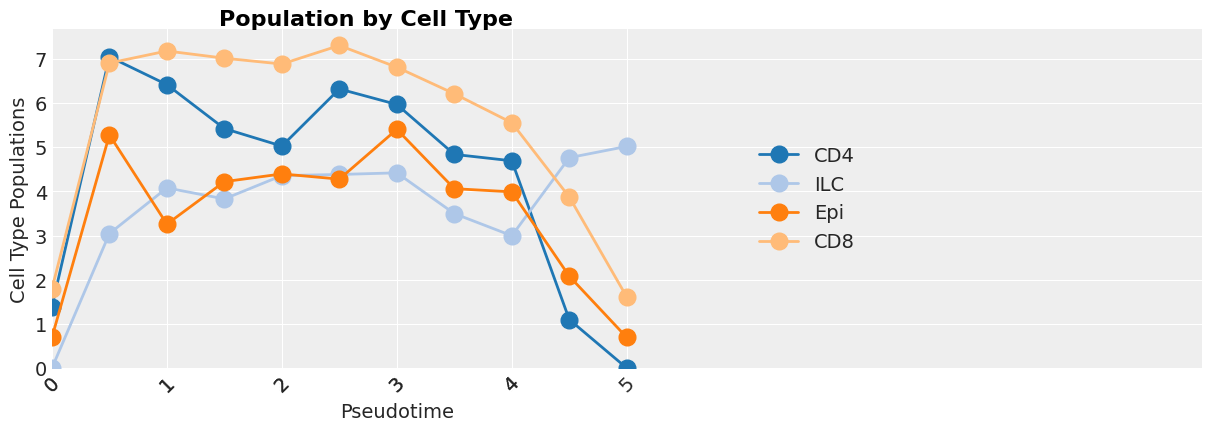

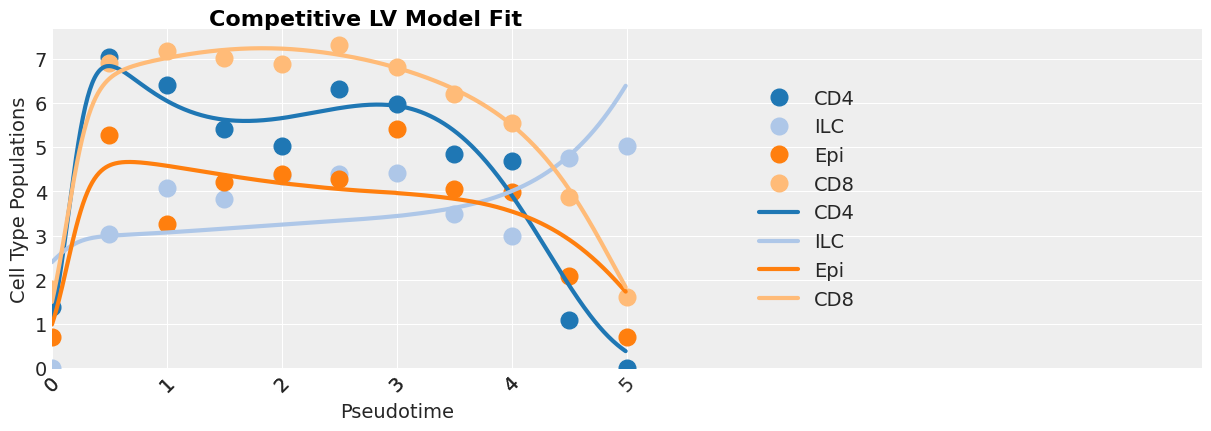

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor
import pytensor.tensor as pt

from numba import njit
from pymc.ode import DifferentialEquation
from pytensor.compile.ops import as_op
from scipy.integrate import odeint
from scipy.optimize import least_squares

#change
species = 4
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)
time = np.arange(0, 5, 0.01)
color = dict(zip(range(species), plt.cm.tab20(range(species))))


def plot_data(ax, fig, lw=2, title="Population by Cell Type"):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=lw, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

_, ax = plt.subplots(figsize=(12, 4))
plot_data(ax, _);

@njit
def lotka_volterra_multi(X, t, theta):
    #change
    species = 4
    dXdt = np.zeros(species)
    r = theta[:species]
    alpha = theta[species:(species + species * species)]
    K = theta[(species + species * species):(2 * species + species * species)]
    for i in range(species):
        interaction_sum = 0.0
        for j in range(species):
            interaction_sum += alpha[i * species + j] * X[j]
        growth = r[i] * X[i] * (1 - (interaction_sum / K[i]))
        dXdt[i] = growth
    return list(dXdt)

def plot_data_notitle(ax, fig, lw=2):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=0, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

def plot_model(ax, fig, x_y, time=time, alpha=1, lw=3, title="Lotka-Volterra Model",):
    for i in range(species):
      ax.plot(time, x_y[:, i], color=color[i], alpha=alpha, lw=lw, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

#change
# X = [7, 2, 1]
# r = [0.2, 0.3, 0.5]
# alpha = [[1, 0.1, 0.1],
#          [0.1, 1, 0.1],
#          [0.1, 0.1, 1]]
# alpha = [item for sublist in alpha for item in sublist]
# K = [200, 200, 200]

X = [3, 3, 3, 3]
r = [0.2, 0.3, 0.3, 0.2]
alpha = [[1, 0.01, 0.01, 0.01],
         [0.01, 1, 0.01, 0.01],
         [0.01, 0.01, 1, 0.01],
         [0.01, 0.01, 0.01, 1]]
alpha = [item for sublist in alpha for item in sublist]
K = [300, 300, 300, 300]

# X = [3, 3, 3, 3, 3]
# r = [0.2, 0.3, 0.3, 0.2, 0.2]
# alpha = [[1, 0.01, 0.01, 0.01, 0.01],
#          [0.01, 1, 0.01, 0.01, 0.01],
#          [0.01, 0.01, 1, 0.01, 0.01],
#          [0.01, 0.01, 0.01, 1, 0.01],
#          [0.01, 0.01, 0.01, 0.01, 1]]
# alpha = [item for sublist in alpha for item in sublist]
# K = [300, 300, 300, 300, 300]

theta = r + alpha + K + X

def ode_model_resid(theta):
    return (
        data.iloc[:, :-1] - odeint(func=lotka_volterra_multi, y0=theta[-species:], t=data.year, args=(theta,))
    ).values.flatten()

lower_bound = [0] * len(theta)
upper_bound = [np.inf] * len(theta)

results = least_squares(ode_model_resid, x0=theta, bounds = (lower_bound, upper_bound))

theta = results.x
print(theta)
x_y = odeint(func=lotka_volterra_multi, y0=theta[-species:], t=time, args=(theta,))
# fig, ax = plt.subplots(figsize=(12, 4))
# plot_data_notitle(ax, fig, lw = 0)
# plot_model(ax, fig, x_y, title="Competitive LV Model Fit");

@njit
def lotka_volterra_multi(X, t, theta):
    #change
    species = 4
    dXdt = np.zeros(species)
    r = theta[:species]
    alpha = theta[species:(species + species * species)]
    K = theta[(species + species * species):(2 * species + species * species)]
    for i in range(species):
        interaction_sum = 0.0
        for j in range(species):
            interaction_sum += alpha[i * species + j] * X[j]
        growth = r[i] * X[i] * (1 - (interaction_sum / K[i]))
        dXdt[i] = growth
    return list(dXdt)

r = theta[:species]
K = theta[(species + species * species):(2 * species + species * species)]

synthetic_data = pd.DataFrame(odeint(func=lotka_volterra_multi, y0=theta[-species:], t=np.arange(0, 5.1, 0.1), args=(theta,)))
# noise_level = 0.1
# noisy_synthetic_data = pd.DataFrame(synthetic_data.values + rng.normal(0, noise_level, synthetic_data.shape))
# for i in range(data.shape[0]):
#   new_points = []
#   for j in range(len(data.iloc[i].values[:-1])):
#     new_points.append(synthetic_data.iloc[i*5][j] + ((data.iloc[i].values[j]-synthetic_data.iloc[i*5][j])/50))
#   synthetic_data.iloc[i*5] = new_points
synthetic_data['year'] = np.arange(0, 5.1, 0.1)

split_data = [pd.DataFrame(synthetic_data.iloc[i:i+11]) for i in range(0, synthetic_data.shape[0] - 11 + 1, 11 - 1)]
x_y = [theta[-species:]]
theta_results = []

for partial_data in split_data:
  def lotka_volterra_multi(X, t, theta):
    #change
    species = 4
    dXdt = np.zeros(species)
    alpha = theta[:species * species]
    for i in range(species):
        interaction_sum = 0.0
        for j in range(species):
            interaction_sum += alpha[i * species + j] * X[j]
        growth = r[i] * X[i] * (1 - (interaction_sum / K[i]))
        dXdt[i] = growth
    return list(dXdt)

  def ode_model_resid(theta):
    return (
        partial_data.iloc[:, :-1] - odeint(func=lotka_volterra_multi, y0=theta[-species:], t=partial_data.year, args=(theta,))
    ).values.flatten()

  lower_bound = [0] * len(theta)
  upper_bound = [np.inf] * len(theta)

  theta1 = theta.copy()
  theta1[-species:] = x_y[-1]
  results = least_squares(ode_model_resid, x0=theta1, bounds = (lower_bound, upper_bound))

  theta_results.append(results.x)

  x_y.extend([list(i) for i in odeint(func=lotka_volterra_multi, y0=theta_results[-1][-species:], t=np.arange(partial_data.year.iloc[0], partial_data.year.iloc[-1], 0.01), args=(theta_results[-1],))])

x_y.pop(0)
x_y = np.array(x_y)

g, ax = plt.subplots(figsize=(12, 4))
plot_data_notitle(ax, g, lw = 0)
plot_model(ax, g, x_y, title="Competitive LV Model Fit");

In [ ]:
np.set_printoptions(precision=3, suppress=True)

def reshape_and_scale_array(arr):
    # Reshape the array into a 4x4 2D array
    reshaped_array = arr.reshape(4, 4)

    # Define a function to scale values
    def scale_value(x):
        if x < 1000:
            return x
        else:
            # Scale the value so that it's reduced to the hundreds digit
            return x / (10 ** (np.floor(np.log10(x)) - 2))

    # Vectorize the scaling function to apply it to the entire array
    vectorized_scale = np.vectorize(scale_value)
    scaled_array = vectorized_scale(reshaped_array)

    return scaled_array


for i in range(len(theta_results)):
  print(repr(np.array(theta_results[i][species:(species + species * species)])))
  print()

print()
print()
print()

for i in range(len(theta_results)):
  print(repr(reshape_and_scale_array(np.array(theta_results[i][species:(species + species * species)]))))
  print()

array([      8.49 ,      16.435,       8.81 ,      16.711,       0.   ,
            32.975,      18.606,       6.14 ,       0.944,      29.365,
            12.119,       4.739, 1651721.668, 2875681.068,  425861.606,
       1222955.364])

array([       8.491,       16.432,        8.809,       16.713,
              0.   ,       32.974,       18.606,        6.141,
              0.944,       29.364,       12.119,        4.74 ,
       23833703.447, 24032865.712, 72761215.566,  8105654.998])

array([ 17.504,   0.   ,  14.446,  13.753,   0.   ,  33.028,  14.545,
         8.448,   1.851,  27.704,  13.178,   4.165, 412.768, 195.89 ,
        20.842, 258.381])

array([19.922, 25.719,  8.191,  2.106,  0.   , 33.79 , 15.971,  7.267,
        0.141, 27.684, 15.897,  4.092, 86.846, 47.197,  9.265,  2.398])

array([   8.497,   16.427,    8.888,   16.661,    0.009,   32.97 ,
         18.663,    6.101,    0.947,   29.364,   12.135,    4.728,
       3216.215, 2796.911, 2039.72 ,  667.449])




array([[  8

In [ ]:
m1 = [8.49024598e+00 1.64346183e+01 8.80971248e+00 1.67113778e+01
 3.16228001e-05 3.29752685e+01 1.86060576e+01 6.14047830e+00
 9.43537049e-01 2.93649543e+01 1.21194285e+01 4.73937084e+00
 1.65172167e+06 2.87568107e+06 4.25861606e+05 1.22295536e+06]

m2 = [8.49054507e+00 1.64317176e+01 8.80886991e+00 1.67129299e+01
 2.22103088e-04 3.29740995e+01 1.86057710e+01 6.14101203e+00
 9.43695094e-01 2.93641419e+01 1.21191644e+01 4.73976266e+00
 2.38337034e+07 2.40328657e+07 7.27612156e+07 8.10565500e+06]

m3 = [1.75042085e+01 4.39328461e-04 1.44464629e+01 1.37527978e+01
 1.07959080e-05 3.30282276e+01 1.45447163e+01 8.44793720e+00
 1.85060066e+00 2.77037823e+01 1.31778168e+01 4.16494205e+00
 4.12768021e+02 1.95889528e+02 2.08423321e+01 2.58380769e+02]

m4 = [1.99216460e+01 2.57194564e+01 8.19052891e+00 2.10575701e+00
 4.78908501e-06 3.37903303e+01 1.59710442e+01 7.26682416e+00
 1.41190103e-01 2.76841781e+01 1.58972503e+01 4.09203853e+00
 8.68464499e+01 4.71972052e+01 9.26505248e+00 2.39813067e+00]

[8.49744827e+00 1.64268815e+01 8.88844229e+00 1.66606666e+01
 8.96508718e-03 3.29704236e+01 1.86630621e+01 6.10104066e+00
 9.46778863e-01 2.93637866e+01 1.21354374e+01 4.72768314e+00
 3.21621536e+03 2.79691098e+03 2.03972038e+03 6.67449323e+02]

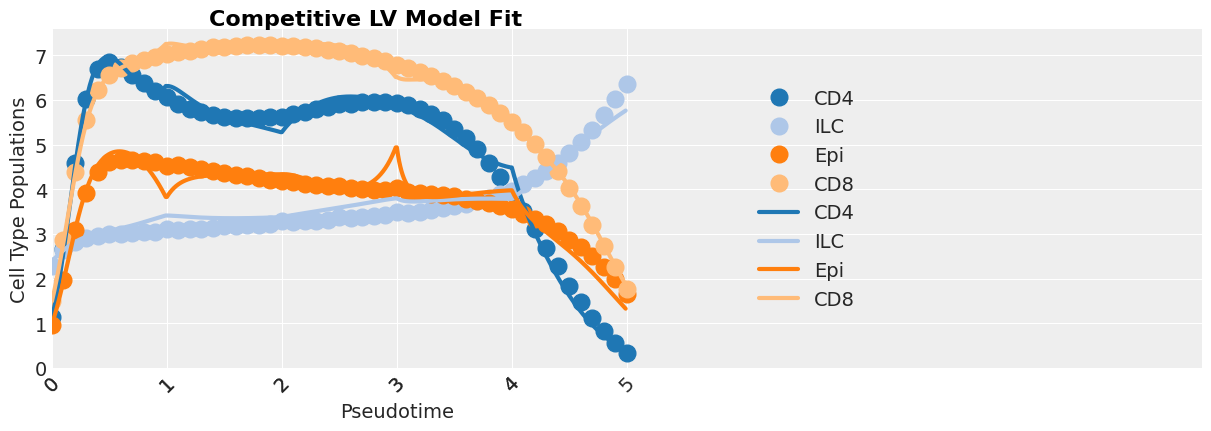

In [ ]:
# synthetic_data = odeint(func=lotka_volterra_multi, y0=theta[-species:], t=np.arange(0, 5.1, 0.1), args=(theta,))
# noise_level = 0.5
# noisy_synthetic_data = pd.DataFrame(synthetic_data + rng.normal(0, noise_level, synthetic_data.shape))
# for i in range(data.shape[0]):
#   noisy_synthetic_data.iloc[i*5] = data.iloc[i].values[:-1]
# noisy_synthetic_data['year'] = np.arange(0, 5.1, 0.1)
h, ax = plt.subplots(figsize=(12, 4))
def plot_data_notitle(ax, fig, lw=2):
    for i in range(species):
      ax.plot(synthetic_data.year, synthetic_data.iloc[:, i], color=color[i], lw=0, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
plot_data_notitle(ax, h)
plot_model(ax, h, x_y, title="Competitive LV Model Fit");

In [ ]:
[pd.DataFrame(synthetic_data.iloc[i:i+11]) for i in range(0, synthetic_data.shape[0] - 11 + 1, 11 - 1)][4]

0         1         2         3  year
40  3.911133  4.005865  3.544873  5.504146   4.0
41  3.523408  4.123050  3.452408  5.276744   4.1
42  3.115709  4.259239  3.344255  5.019633   4.2
43  2.696688  4.417300  3.218454  4.729364   4.3
44  2.276660  4.600431  3.072969  4.403026   4.4
45  1.867236  4.812149  2.905753  4.038867   4.5
46  1.480650  5.056235  2.714888  3.637118   4.6
47  1.128760  5.336621  2.498854  3.201026   4.7
48  0.821766  5.657168  2.256985  2.737971   4.8
49  0.566850  6.021318  1.990194  2.260396   4.9
50  0.367032  6.431564  1.701998  1.786101   5.0

In [ ]:
noisy_synthetic_data

0         1         2         3
0   0.000000  0.000000  0.000000  0.000000
1   2.658587  2.507483  2.190684  2.876077
2   4.568095  2.838003  3.124271  4.480328
3   6.058121  3.039225  4.101923  5.406228
4   6.653400  3.164816  4.370561  5.949718
5   6.826585  3.003541  4.661088  6.339556
6   6.812571  2.929797  4.714229  6.691151
7   6.752887  2.936038  4.557386  6.872472
8   6.302626  3.082740  4.648671  6.841027
9   6.206225  3.195154  4.531549  6.881268
10  6.033509  3.236085  4.606970  7.020031
11  5.909286  3.187085  4.593542  7.097429
12  5.829981  3.332127  4.425257  6.969558
13  5.666446  3.115436  4.499300  7.141335
14  5.755142  3.193427  4.614344  7.199677
15  5.584235  3.229570  4.328237  7.361674
16  5.761924  3.277096  4.311263  7.213984
17  5.628699  3.195959  4.340379  7.127456
18  5.545287  3.400387  4.248029  7.202594
19  5.686459  3.201757  4.205038  7.199305
20  5.711022  3.257302  4.160749  7.411114
21  5.665177  3.297879  4.363652  7.155311
22  5.725302  3.337722  4.046600  7.208984
23  5.785817  3.169912  4.169057  7.241280
24  5.710730  3.293396  4.223249  7.068537
25  5.881709  3.373506  4.073052  7.084657
26  5.964521  3.222401  4.314909  7.046092
27  5.929847  3.358897  3.963879  7.030073
28  5.964501  3.251765  3.871797  6.972603
29  5.935303  3.495707  3.969086  6.852350
30  5.771203  3.470404  3.986727  6.922546
31  5.773562  3.445918  3.889472  6.674768
32  5.638858  3.533425  3.887884  6.640570
33  5.893030  3.333333  4.055620  6.455831
34  5.549816  3.520792  3.785065  6.419284
35  5.317525  3.712340  3.821155  6.328145
36  5.213838  3.734697  3.959543  6.260922
37  4.965981  3.597003  3.866530  6.190773
38  4.510018  3.947762  3.579942  5.849000
39  4.276153  3.882339  3.730300  5.801731
40  3.887131  4.043055  3.591584  5.448146
41  3.534604  4.016483  3.478688  5.287583
42  3.209215  4.412833  3.567916  5.008185
43  2.615268  4.542191  3.373586  4.757446
44  2.272226  4.630247  3.172964  4.316905
45  1.989282  4.718163  2.834510  4.069444
46  1.426624  5.231865  2.688399  3.624107
47  1.054973  5.271909  2.613124  3.338018
48  0.836669  5.735187  2.212216  2.721880
49  0.694222  5.947533  2.061846  2.319168
50  0.372680  6.547102  1.908158  1.691017

In [ ]:
noisy_synthetic_data[5]

array([6.86268256, 3.07094414, 4.70558402, 6.43500385])

In [ ]:
noisy_synthetic_data

array([[1.14241881, 2.43731294, 1.10701066, 1.52774117],
       [2.67761421, 2.66457847, 2.15418586, 2.87688393],
       [4.4460899 , 2.73778066, 3.0338821 , 4.50721786],
       [6.14361977, 2.88329336, 3.92779564, 5.5272887 ],
       [6.54737399, 2.85785809, 4.25589836, 6.24432611],
       [6.91573769, 2.97961313, 4.53793183, 6.61952251],
       [6.65105993, 2.81183449, 4.64751225, 6.75682652],
       [6.46178791, 2.88126873, 4.59370699, 6.68855525],
       [6.35023959, 3.00992646, 4.66002569, 6.99261916],
       [6.20048465, 3.10875976, 4.65933449, 6.80233024],
       [6.02256858, 2.95962643, 4.46068042, 7.02371646],
       [6.01963121, 3.1474074 , 4.58158798, 7.20721842],
       [5.80155988, 3.03367095, 4.45041746, 7.05321293],
       [5.53124678, 3.24122018, 4.43673371, 7.13338383],
       [5.61445824, 3.14095118, 4.35391051, 7.26896857],
       [5.45812416, 3.22359078, 4.37761638, 7.31587508],
       [5.73727463, 3.31135839, 4.3289934 , 7.13256632],
       [5.73825029, 3.08828147,

In [ ]:
odeint(func=lotka_volterra_multi, y0=theta[-species:], t=time, args=(theta,))

array([[1.12647215, 2.39854651, 0.98554356, 1.49643801],
       [1.24349736, 2.42459195, 1.0664788 , 1.61209959],
       [1.36896668, 2.45031973, 1.15169052, 1.73333489],
       ...,
       [0.42120033, 6.30356133, 1.79035395, 1.92678749],
       [0.40260007, 6.34575811, 1.76106182, 1.879678  ],
       [0.38454483, 6.3884262 , 1.7316067 , 1.83277414]])

In [ ]:
np.arange(0, 5.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [ ]:
data

CD4       ILC       Epi       CD8  year
X0   1.386294  0.000000  0.693147  1.791759   0.0
X1   7.044905  3.044522  5.278115  6.903747   0.5
X2   6.415097  4.077537  3.258097  7.176255   1.0
X3   5.420535  3.828641  4.219508  7.013016   1.5
X4   5.023881  4.356709  4.394449  6.881411   2.0
X5   6.317165  4.382027  4.276666  7.301148   2.5
X6   5.966147  4.418841  5.402677  6.809039   3.0
X7   4.836282  3.496508  4.060443  6.208590   3.5
X8   4.691348  2.995732  3.988984  5.552960   4.0
X9   1.098612  4.762174  2.079442  3.871201   4.5
X10  0.000000  5.017280  0.693147  1.609438   5.0

[  2.45502891   2.29291546   1.000001   137.2791852   77.50898097
   0.99999944 821.16467655 529.99911405   1.000001     0.95350778]


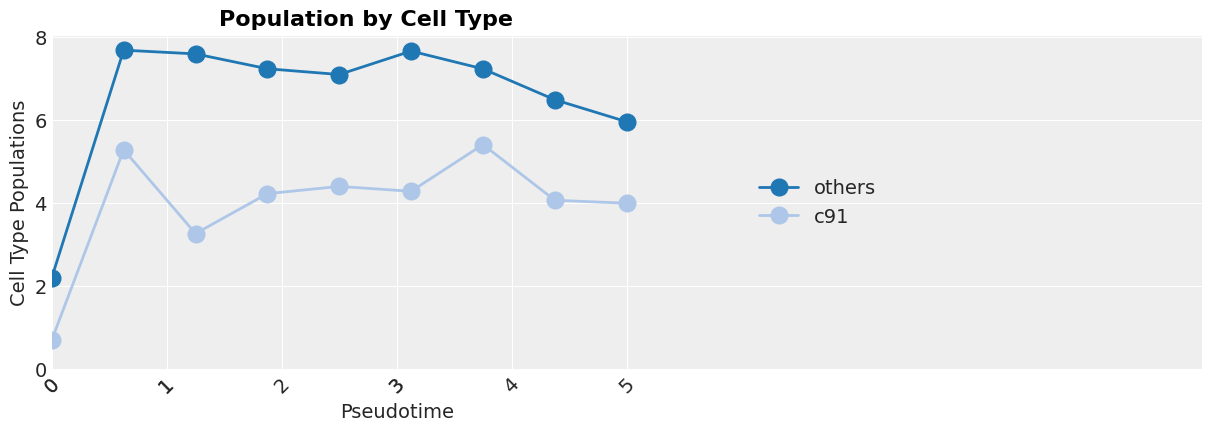

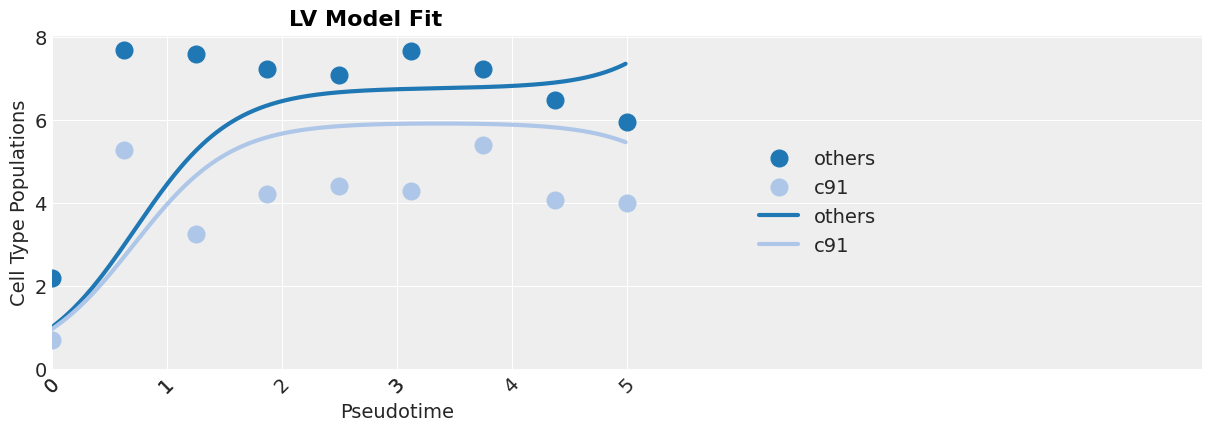

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor
import pytensor.tensor as pt

from numba import njit
from pymc.ode import DifferentialEquation
from pytensor.compile.ops import as_op
from scipy.integrate import odeint
from scipy.optimize import least_squares

species = 2
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)
time = np.arange(0, 5, 0.01)
color = dict(zip(range(species), plt.cm.tab20(range(species))))


def plot_data(ax, fig, lw=2, title="Population by Cell Type"):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=lw, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

_, ax = plt.subplots(figsize=(12, 4))
plot_data(ax, _);

@njit
def lotka_volterra_multi(X, t, theta):
    species = 2
    dXdt = np.zeros(species)
    r = theta[:species]
    alpha = theta[species:(species + species * species)]
    K = theta[(species + species * species):(2 * species + species * species)]
    for i in range(species):
        interaction_sum = 0.0
        for j in range(species):
            interaction_sum += alpha[i * species + j] * X[j]
        growth = r[i] * X[i] * (1 - (interaction_sum / K[i]))
        dXdt[i] = growth
    return list(dXdt)

def plot_data_notitle(ax, fig, lw=2):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=0, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

def plot_model(ax, fig, x_y, time=time, alpha=1, lw=3, title="Lotka-Volterra Model",):
    for i in range(species):
      ax.plot(time, x_y[:, i], color=color[i], alpha=alpha, lw=lw, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

X = [1, 1]
r = [0.3, 0.5]
alpha = [[1, 0.01],
         [0.01, 1]]
alpha = [item for sublist in alpha for item in sublist]
K = [1000, 800]

#change
# X = [1, 1, 1]
# r = [0.02, 0.3, 0.5]
# alpha = [[1, 0.01, 0.01],
#          [0.01, 1, 0.01],
#          [0.01, 0.01, 1]]
# alpha = [item for sublist in alpha for item in sublist]
# K = [1000, 800, 200]

# X = [1, 1, 1, 1]
# r = [0.02, 0.3, 0.5, 0.2]
# alpha = [[1, 0.01, 0.01],
#          [0.01, 1, 0.01],
#          [0.01, 0.01, 1]]
# alpha = [item for sublist in alpha for item in sublist]
# K = [1000, 800, 200]

theta = r + alpha + K + X

def ode_model_resid(theta):
    return (
        data.iloc[:, :-1] - odeint(func=lotka_volterra_multi, y0=theta[-species:], t=data.year, args=(theta,))
    ).values.flatten()

lower_bound = [0] * len(theta)
# for i in range(species):
#   lower_bound[(i+1) * species + i] = 0.999999
upper_bound = [np.inf] * len(theta)
# for i in range(species):
#   upper_bound[(i+1) * species + i] = 1.000001

results = least_squares(ode_model_resid, x0=theta, bounds = (lower_bound, upper_bound))

theta = results.x
print(theta)
x_y = odeint(func=lotka_volterra_multi, y0=theta[-species:], t=time, args=(theta,))
fig, ax = plt.subplots(figsize=(12, 4))
plot_data_notitle(ax, fig, lw = 0)
plot_model(ax, fig, x_y, title="LV Model Fit");

# @as_op(itypes=[pt.dvector], otypes=[pt.dmatrix])
# def pytensor_forward_model_matrix(theta):
#     return odeint(func=lotka_volterra_multi, y0=theta[-species:], t=data.year, args=(theta,))

# theta = results.x
# with pm.Model() as model:
#     r = theta[:species]
#     alpha = theta[species:(species + pow(species, 2))]
#     K = theta[(species + pow(species, 2)):(2 * species + pow(species, 2))]
#     X = theta[-species:]
#     X_prior = []
#     r_prior = []
#     K_prior = []
#     for i in range(species):
#         r_prior.append(pm.TruncatedNormal("r_" + str(i), mu=r[i], lower = r[i]- 0.001, upper = r[i] + 0.001, sigma=0.001, initval=r[i]))
#         K_prior.append(pm.TruncatedNormal("K_" + str(i), mu=K[i], lower = K[i]- 0.001, upper = K[i] + 0.001, sigma=0.001, initval=K[i]))
#         X_prior.append(pm.TruncatedNormal("X_" + str(i), mu=X[i], lower = X[i]- 0.001, upper = X[i] + 0.001, sigma=0.001, initval=X[i]))


#     alpha_prior = []
#     for i in range(species):
#         alpha_prior.append([])
#         for j in range(species):
#             if i == j:
#                 alpha_prior[i].append(pm.TruncatedNormal("alpha_" + str(i) + "_" + str(j), mu=alpha[i * species + j], lower = alpha[i * species + j]- 0.001, upper = alpha[i * species + j] + 0.001, sigma=0.001,
#                                                      initval=alpha[i * species + j]))
#             else:
#                 alpha_prior[i].append(pm.TruncatedNormal("alpha_" + str(i) + "_" + str(j), mu=alpha[i * species + j], lower = alpha[i * species + j]- 0.001, upper = alpha[i * species + j] + 0.001, sigma=0.001,
#                                                      initval=alpha[i * species + j]))
#     sigma = pm.HalfNormal("sigma", 10)

#     flattened_alpha_prior = [item for sublist in alpha_prior for item in sublist]
#     all_priors = r_prior + flattened_alpha_prior + K_prior + X_prior

#     ode_solution = pytensor_forward_model_matrix(
#         pm.math.stack(all_priors)
#     )

#     pm.Normal("Y_obs", mu=ode_solution, sigma=sigma, observed=data.iloc[:, :-1].values)

# vars_list = list(model.values_to_rvs.keys())[:-1]

# sampler = "Slice Sampler"
# tune = draws = 200

# with model:
#     trace_slice = pm.sample(step=[pm.Slice(vars_list)], tune=tune, draws=draws)
# trace = trace_slice
# az.summary(trace)

<ipython-input-43-3ee7ee3528a9>:103: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  data.iloc[:, :-1] - odeint(func=lotka_volterra_general, y0=theta[-species:], t=data.year, args=(theta,))


[ 0.97187518  0.05734483  0.20832058  0.78306969 -1.05128904  1.63075818
  0.22773444  0.471391    0.41568155 -0.82478556 -0.00567776 -0.22539307
 -0.92878014  0.32685464  0.56155443  0.51322741 -1.02860969  1.7558661
  0.35099877  0.31259398  1.71897134  1.26013558  1.26687026  3.79391326]


Text(0.05, 1, 'C')

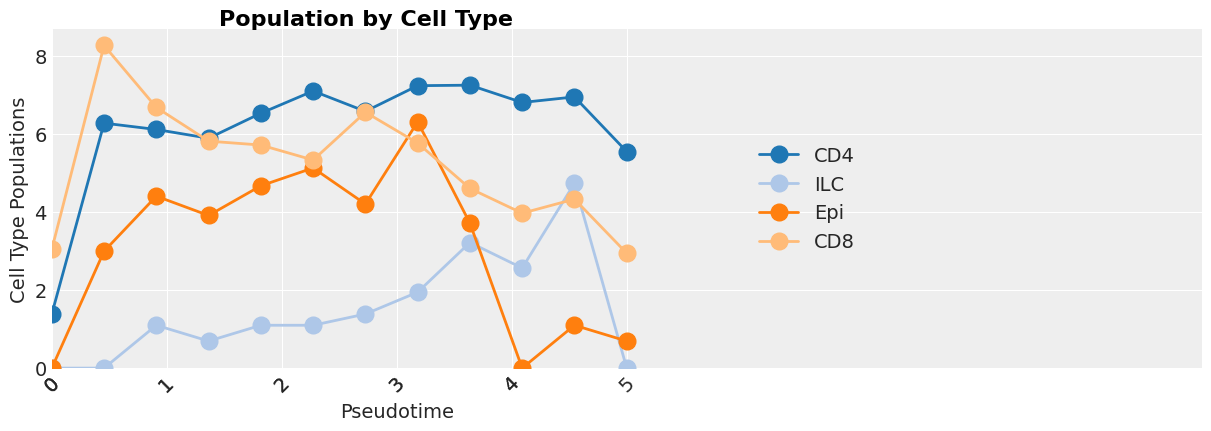

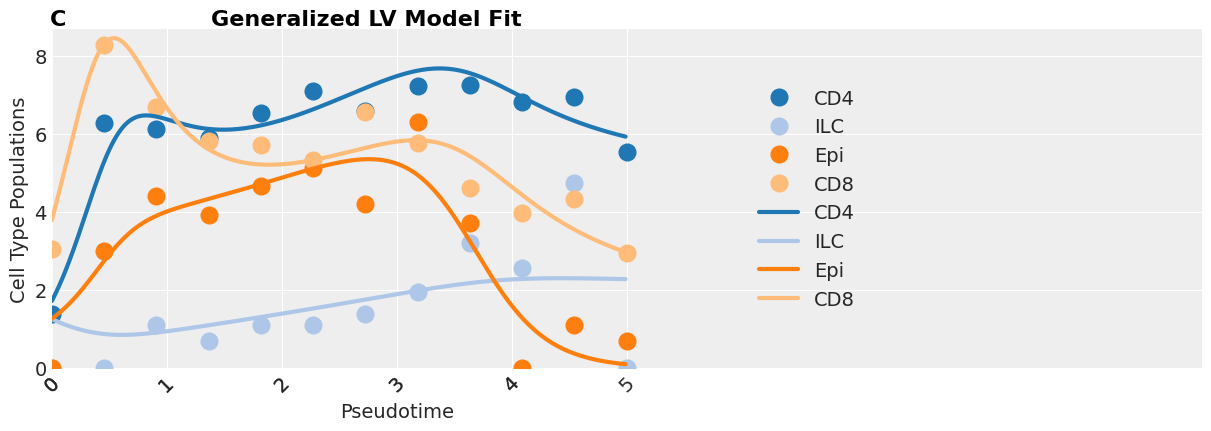

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor
import pytensor.tensor as pt

from numba import njit
from pymc.ode import DifferentialEquation
from pytensor.compile.ops import as_op
from scipy.integrate import odeint
from scipy.optimize import least_squares

#change
species = 4
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)
time = np.arange(0, 5, 0.01)
color = dict(zip(range(species), plt.cm.tab20(range(species))))


def plot_data(ax, fig, lw=2, title="Population by Cell Type"):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=lw, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

_, ax = plt.subplots(figsize=(12, 4))
plot_data(ax, _);

@njit
def lotka_volterra_general(X, t, theta):
    #change
    species = 4
    dXdt = np.zeros(species)
    r = theta[:species]
    alpha = theta[species:(species + species * species)]
    for i in range(species):
        interaction_sum = 0.0
        for j in range(species):
            interaction_sum += alpha[i * species + j] * X[j]
        growth = X[i] * (r[i] + interaction_sum)
        dXdt[i] = growth
    return list(dXdt)

def plot_data_notitle(ax, fig, lw=2):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=0, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

def plot_model(ax, fig, x_y, time=time, alpha=1, lw=3, title="Lotka-Volterra Model",):
    for i in range(species):
      ax.plot(time, x_y[:, i], color=color[i], alpha=alpha, lw=lw, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

#change
# X = [7, 2, 1]
# r = [0.2, 0.3, 0.5]
# alpha = [[1, 0.1, 0.1],
#          [0.1, 1, 0.1],
#          [0.1, 0.1, 1]]
# alpha = [item for sublist in alpha for item in sublist]

X = [3, 3, 3, 3]
r = [0.2, 0.3, 0.3, 0.2]
alpha = [[-1, 0.01, 0.01, 0.01],
         [0.01, -1, 0.01, 0.01],
         [0.01, 0.01, -1, 0.01],
         [0.01, 0.01, 0.01, -1]]
alpha = [item for sublist in alpha for item in sublist]

# X = [3, 3, 3, 3, 3]
# r = [0.2, 0.3, 0.3, 0.2, 0.2]
# alpha = [[1, 0.01, 0.01, 0.01, 0.01],
#          [0.01, 1, 0.01, 0.01, 0.01],
#          [0.01, 0.01, 1, 0.01, 0.01],
#          [0.01, 0.01, 0.01, 1, 0.01],
#          [0.01, 0.01, 0.01, 0.01, 1]]
# alpha = [item for sublist in alpha for item in sublist]

theta = r + alpha + X

def ode_model_resid(theta):
    return (
        data.iloc[:, :-1] - odeint(func=lotka_volterra_general, y0=theta[-species:], t=data.year, args=(theta,))
    ).values.flatten()

lower_bound = [-np.inf] * len(theta)
for i in range(species):
  lower_bound[i] = 0
  lower_bound[-(i+1)] = 0
# for i in range(species):
#   lower_bound[(i+1) * species + i] = -1.000001
upper_bound = [np.inf] * len(theta)
# for i in range(species):
#   upper_bound[(i+1) * species + i] = -0.999999

results = least_squares(ode_model_resid, x0=theta, bounds = (lower_bound, upper_bound))

theta = results.x
print(theta)
x_y = odeint(func=lotka_volterra_general, y0=theta[-species:], t=time, args=(theta,))
fig, ax = plt.subplots(figsize=(12, 4))
plot_data_notitle(ax, fig, lw = 0)
plot_model(ax, fig, x_y, title="Generalized LV Model Fit");
fig.text(0.05, 1, "C", ha='right', fontsize=16, color='black', fontweight='bold')

# @as_op(itypes=[pt.dvector], otypes=[pt.dmatrix])
# def pytensor_forward_model_matrix(theta):
#     return odeint(func=lotka_volterra_general, y0=theta[-species:], t=data.year, args=(theta,))

# theta = results.x
# with pm.Model() as model:
#     r = theta[:species]
#     alpha = theta[species:(species + pow(species, 2))]
#     X = theta[-species:]
#     X_prior = []
#     r_prior = []
#     for i in range(species):
#         r_prior.append(pm.TruncatedNormal("r_" + str(i), mu=r[i], sigma=r[i]/4, lower = 0, initval=r[i]))
#         X_prior.append(pm.TruncatedNormal("X_" + str(i), mu=X[i], sigma=X[i]/4, lower = 0, initval=X[i]))

#     alpha_prior = []
#     for i in range(species):
#         alpha_prior.append([])
#         for j in range(species):
#             if i == j:
#                 alpha_prior[i].append(pm.Normal("alpha_" + str(i) + "_" + str(j), mu=alpha[i * species + j], sigma=abs((alpha[i * species + j]/4)) + 0.001,
#                                                      initval=alpha[i * species + j]))
#             else:
#                 alpha_prior[i].append(pm.Normal("alpha_" + str(i) + "_" + str(j), mu=alpha[i * species + j], sigma=abs((alpha[i * species + j]/4)) + 0.001,
#                                                      initval=alpha[i * species + j]))
#     sigma = pm.HalfNormal("sigma", 10)

#     flattened_alpha_prior = [item for sublist in alpha_prior for item in sublist]
#     all_priors = r_prior + flattened_alpha_prior + X_prior

#     ode_solution = pytensor_forward_model_matrix(
#         pm.math.stack(all_priors)
#     )

#     pm.Normal("Y_obs", mu=ode_solution, sigma=sigma, observed=data.iloc[:, :-1].values)

# vars_list = list(model.values_to_rvs.keys())[:-1]

# sampler = "Slice Sampler"
# tune = draws = 200

# with model:
#     trace_slice = pm.sample(step=[pm.Slice(vars_list)], tune=tune, draws=draws)
# trace = trace_slice
# az.summary(trace)

<ipython-input-48-30bf607a7dec>:108: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  data.iloc[:, :-1] - odeint(func=lotka_volterra_random, y0=theta[-species:], t=data.year, args=(theta,))


[ 4.65923801e+00  4.85277323e-01  3.14598203e+01  3.80097682e+00
  1.57740877e+01  3.44813191e+01  1.72720104e+01  8.43605214e-01
  3.38553659e+01 -5.07733569e+01 -8.12377058e+01  3.40708001e+01
  1.10202391e+01  4.41104317e+01  3.79706845e+01 -2.23310940e+01
 -1.24120732e+01  6.47329862e+01  2.33583267e+01  1.52522602e+01
  2.24632739e+02  3.12066030e+02  1.56475103e+02  1.73569383e+02
  1.48651037e+00  4.19131757e-01  9.11792319e-09  3.03441380e+00]


mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
K_0        225.302  1.182  223.105  226.880      0.028    0.020    1848.0   
K_1        311.998  1.795  308.946  314.757      0.043    0.030    1650.0   
K_2        156.206  0.860  154.911  157.696      0.019    0.014    2021.0   
K_3        173.634  1.022  171.854  175.115      0.023    0.016    2102.0   
X_0          1.488  0.009    1.474    1.502      0.000    0.000    1985.0   
X_1          0.419  0.003    0.415    0.424      0.000    0.000    1959.0   
X_2          0.002  0.000    0.002    0.003      0.000    0.000    1652.0   
X_3          3.034  0.018    3.005    3.063      0.000    0.000    1961.0   
alpha_0_0   15.756  0.090   15.617   15.905      0.002    0.001    2012.0   
alpha_0_1   34.471  0.202   34.147   34.796      0.005    0.003    1914.0   
alpha_0_2   17.258  0.097   17.100   17.417      0.002    0.002    2067.0   
alpha_0_3    0.843  0.005    0.835    0.851      0.000    0.000    1798.0   
alpha_1_0   33.881  0.193   33.528   34.159      0.004    0.003    1932.0   
alpha_1_1  -50.764  0.302  -51.226  -50.267      0.007    0.005    1605.0   
alpha_1_2  -81.142  0.457  -81.904  -80.426      0.010    0.007    2047.0   
alpha_1_3   34.084  0.199   33.774   34.411      0.005    0.003    1908.0   
alpha_2_0   11.028  0.063   10.927   11.130      0.001    0.001    2229.0   
alpha_2_1   44.139  0.248   43.739   44.550      0.006    0.004    1842.0   
alpha_2_2   38.039  0.212   37.656   38.348      0.005    0.004    1776.0   
alpha_2_3  -22.302  0.130  -22.518  -22.109      0.003    0.002    1938.0   
alpha_3_0  -12.412  0.072  -12.536  -12.304      0.002    0.001    1875.0   
alpha_3_1   64.726  0.368   64.123   65.325      0.008    0.006    2079.0   
alpha_3_2   23.355  0.137   23.125   23.564      0.003    0.002    1967.0   
alpha_3_3   15.249  0.089   15.115   15.403      0.002    0.001    1928.0   
r_0          4.662  0.027    4.618    4.706      0.001    0.000    1813.0   
r_1          0.485  0.003    0.480    0.490      0.000    0.000    1894.0   
r_2         31.458  0.186   31.177   31.775      0.004    0.003    2110.0   
r_3          3.801  0.023    3.763    3.836      0.000    0.000    2094.0   
sigma        1.214  0.131    0.968    1.443      0.003    0.002    1757.0   

           ess_tail  r_hat  
K_0          1441.0   1.00  
K_1          1031.0   1.01  
K_2          1379.0   1.00  
K_3          1160.0   1.00  
X_0          1467.0   1.00  
X_1          1175.0   1.00  
X_2          1117.0   1.00  
X_3          1424.0   1.00  
alpha_0_0    1426.0   1.00  
alpha_0_1    1263.0   1.00  
alpha_0_2    1431.0   1.00  
alpha_0_3    1208.0   1.00  
alpha_1_0    1326.0   1.00  
alpha_1_1    1169.0   1.00  
alpha_1_2    1310.0   1.01  
alpha_1_3    1093.0   1.00  
alpha_2_0    1003.0   1.00  
alpha_2_1    1003.0   1.01  
alpha_2_2    1222.0   1.00  
alpha_2_3    1283.0   1.00  
alpha_3_0    1423.0   1.00  
alpha_3_1    1238.0   1.01  
alpha_3_2    1269.0   1.00  
alpha_3_3    1271.0   1.00  
r_0          1326.0   1.00  
r_1          1303.0   1.00  
r_2          1274.0   1.00  
r_3          1154.0   1.00  
sigma        1469.0   1.00

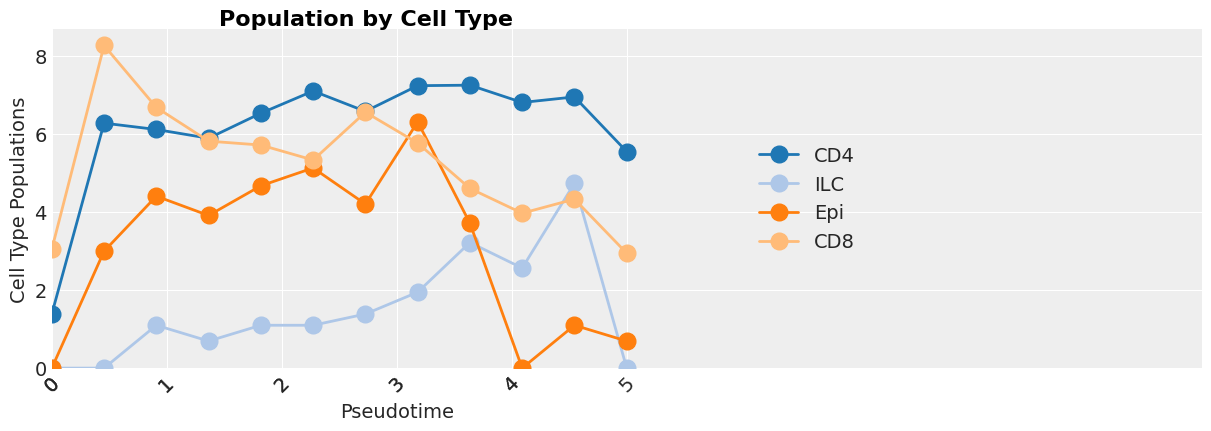

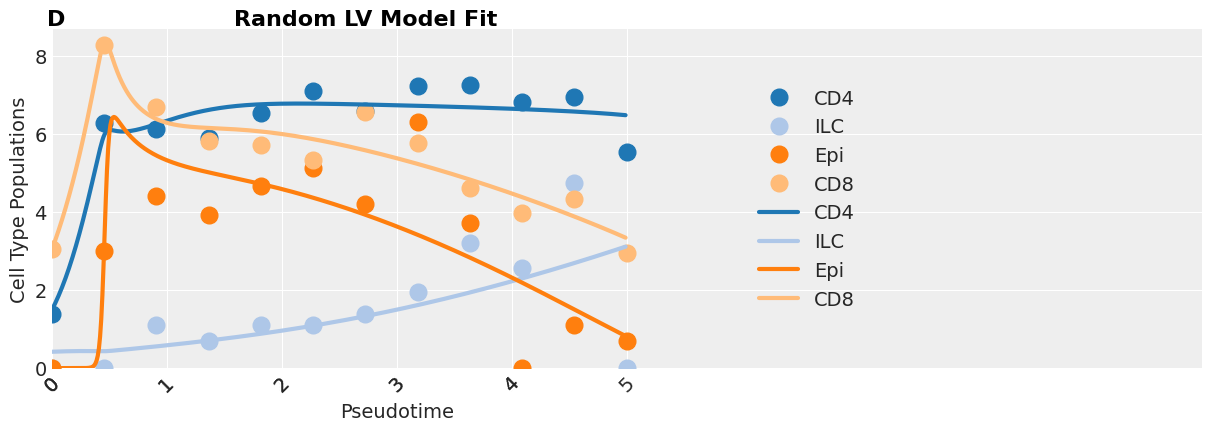

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor
import pytensor.tensor as pt
import math

from numba import njit
from pymc.ode import DifferentialEquation
from pytensor.compile.ops import as_op
from scipy.integrate import odeint
from scipy.optimize import least_squares

#change
species = 4
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)
time = np.arange(0, 5, 0.01)
color = dict(zip(range(species), plt.cm.tab20(range(species))))


def plot_data(ax, fig, lw=2, title="Population by Cell Type"):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=lw, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

_, ax = plt.subplots(figsize=(12, 4))
plot_data(ax, _);

@njit
def lotka_volterra_random(X, t, theta):
    #change
    species = 4
    dXdt = np.zeros(species)
    r = theta[:species]
    alpha = theta[species:(species + species * species)]
    K = theta[(species + pow(species, 2)):(2 * species + pow(species, 2))]
    for i in range(species):
        interaction_sum = 0.0
        for j in range(species):
            interaction_sum += alpha[i * species + j] * X[j]
        growth = (r[i] * X[i]/K[i]) * (K[i] - interaction_sum)
        dXdt[i] = growth
    return list(dXdt)

def plot_data_notitle(ax, fig, lw=2):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=0, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

def plot_model(ax, fig, x_y, time=time, alpha=1, lw=3, title="Lotka-Volterra Model",):
    for i in range(species):
      ax.plot(time, x_y[:, i], color=color[i], alpha=alpha, lw=lw, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

#change
# X = [7, 2, 1]
# r = [0.2, 0.3, 0.5]
# alpha = [[1, 0.1, 0.1],
#          [0.1, 1, 0.1],
#          [0.1, 0.1, 1]]
# alpha = [item for sublist in alpha for item in sublist]
# K = [200, 200, 200]

X = [3, 3, 3, 3]
r = [0.2, 0.3, 0.3, 0.2]
alpha = [[-1, 0.01, 0.01, 0.01],
         [0.01, -1, 0.01, 0.01],
         [0.01, 0.01, -1, 0.01],
         [0.01, 0.01, 0.01, -1]]
alpha = [item for sublist in alpha for item in sublist]
K = [300, 300, 300, 300]

# X = [3, 3, 3, 3, 3]
# r = [0.2, 0.3, 0.3, 0.2, 0.2]
# alpha = [[1, 0.01, 0.01, 0.01, 0.01],
#          [0.01, 1, 0.01, 0.01, 0.01],
#          [0.01, 0.01, 1, 0.01, 0.01],
#          [0.01, 0.01, 0.01, 1, 0.01],
#          [0.01, 0.01, 0.01, 0.01, 1]]
# alpha = [item for sublist in alpha for item in sublist]
# K = [300, 300, 300, 300, 300]

theta = r + alpha + K + X

def ode_model_resid(theta):
    return (
        data.iloc[:, :-1] - odeint(func=lotka_volterra_random, y0=theta[-species:], t=data.year, args=(theta,))
    ).values.flatten()

lower_bound = [-np.inf] * len(theta)
for i in range(species):
  lower_bound[i] = 0
  lower_bound[-(i+1)] = 0
  lower_bound[-(species+i+1)] = 0
# for i in range(species):
#   lower_bound[(i+1) * species + i] = -1.000001
upper_bound = [np.inf] * len(theta)
# for i in range(species):
#   upper_bound[(i+1) * species + i] = -0.999999

results = least_squares(ode_model_resid, x0=theta, bounds = (lower_bound, upper_bound))

theta = results.x
print(theta)
x_y = odeint(func=lotka_volterra_random, y0=theta[-species:], t=time, args=(theta,))
fig, ax = plt.subplots(figsize=(12, 4))
plot_data_notitle(ax, fig, lw = 0)
plot_model(ax, fig, x_y, title="Random LV Model Fit")
theta2 = theta.copy()
fig.text(0.05, 1, "D", ha='right', fontsize=16, color='black', fontweight='bold')


@as_op(itypes=[pt.dvector], otypes=[pt.dmatrix])
def pytensor_forward_model_matrix(theta):
    return odeint(func=lotka_volterra_random, y0=theta[-species:], t=data.year, args=(theta,))

theta = results.x
with pm.Model() as model:
    r = theta[:species]
    alpha = theta[species:(species + pow(species, 2))]
    K = theta[(species + pow(species, 2)):(2 * species + pow(species, 2))]
    X = theta[-species:]
    X[2] = 0.002
    X_prior = []
    r_prior = []
    K_prior = []
    for i in range(species):
        r_prior.append(pm.TruncatedNormal("r_" + str(i), mu=r[i], lower = r[i]*99/100, upper = r[i]*101/100 + 0.001, sigma=r[i]/10 + 0.001, initval=r[i]))
        X_prior.append(pm.TruncatedNormal("X_" + str(i), mu=X[i], lower = X[i]*99/100, upper = X[i]*101/100 + 0.001, sigma=X[i]/10 + 0.001, initval=X[i]))
        K_prior.append(pm.TruncatedNormal("K_" + str(i), mu=K[i], lower = K[i]*99/100, upper = K[i]*101/100 + 0.001, sigma=K[i]/10 + 0.001, initval=K[i]))

    alpha_prior = []
    for i in range(species):
        alpha_prior.append([])
        for j in range(species):
            alpha_prior[i].append(pm.TruncatedNormal("alpha_" + str(i) + "_" + str(j), mu=alpha[i * species + j], lower = alpha[i * species + j] * (1 - math.copysign(1, alpha[i * species + j]) * 0.01), upper = alpha[i * species + j]* (1 + math.copysign(1, alpha[i * species + j]) * 0.01), sigma=abs((alpha[i * species + j]/10)) + 0.001,
                                                     initval=alpha[i * species + j]))
    sigma = pm.HalfNormal("sigma", 10)

    flattened_alpha_prior = [item for sublist in alpha_prior for item in sublist]
    all_priors = r_prior + flattened_alpha_prior + K_prior + X_prior

    ode_solution = pytensor_forward_model_matrix(
        pm.math.stack(all_priors)
    )

    pm.Normal("Y_obs", mu=ode_solution, sigma=sigma, observed=data.iloc[:, :-1].values)

vars_list = list(model.values_to_rvs.keys())[:-1]

sampler = "Slice Sampler"
tune = draws = 500

with model:
    trace_slice = pm.sample(step=[pm.Slice(vars_list)], tune=tune, draws=draws)
trace = trace_slice
az.summary(trace)

Text(0.05, 1, 'D')

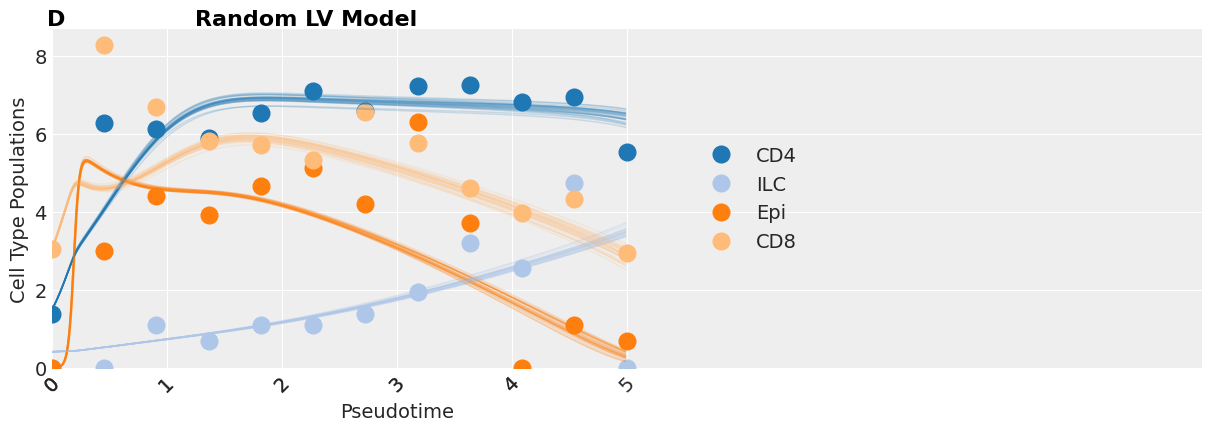

In [ ]:
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000

mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 0.1

def plot_model_notitle(ax, fig, x_y, time=time, alpha=1, lw=3, title="Lotka-Volterra Model",):
    for i in range(species):
      ax.plot(time, x_y[:, i], color=color[i], alpha=alpha, lw=lw, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    return ax

def plot_model_trace(ax, fig, trace_df, row_idx, lw=1, alpha=0.2):
    cols = ['r_0', 'r_1', 'r_2', 'r_3',
            'alpha_0_0', 'alpha_0_1', 'alpha_0_2', 'alpha_0_3',
            'alpha_1_0', 'alpha_1_1', 'alpha_1_2', 'alpha_1_3',
            'alpha_2_0', 'alpha_2_1', 'alpha_2_2', 'alpha_2_3',
            'alpha_3_0', 'alpha_3_1', 'alpha_3_2', 'alpha_3_3',
            'K_0', 'K_1', 'K_2', 'K_3',
            'X_0', 'X_1', 'X_2', 'X_3']
    row = trace_df.iloc[row_idx, :][cols].values

    time = np.arange(0, 5, 0.01)
    theta = row
    x_y = odeint(func=lotka_volterra_random, y0=theta[-species:], t=time, args=(theta,))
    plot_model_notitle(ax, fig, x_y, time=time, lw=lw, alpha=alpha);

def plot_inference(ax, fig, trace, num_samples=25, title="Random Model", plot_model_kwargs=dict(lw=1, alpha=0.2),):
    trace_df = az.extract(trace, num_samples=num_samples).to_dataframe()
    plot_data_notitle(ax, fig, lw=0)
    for row_idx in range(num_samples):
        plot_model_trace(ax, fig, trace_df, row_idx, **plot_model_kwargs)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:4], labels[:4], loc="center left", bbox_to_anchor=(0.55, 0.5))
    fig.text(0.25, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')

g, ax = plt.subplots(figsize=(12, 4))
plot_inference(ax, g, trace, title=f"Random LV Model");
g.text(0.05, 1, "D", ha='right', fontsize=16, color='black', fontweight='bold')


In [ ]:
list(trace_slice.posterior.data_vars)

['K_0',
 'K_1',
 'K_2',
 'K_3',
 'X_0',
 'X_1',
 'X_2',
 'X_3',
 'alpha_0_0',
 'alpha_0_1',
 'alpha_0_2',
 'alpha_0_3',
 'alpha_1_0',
 'alpha_1_1',
 'alpha_1_2',
 'alpha_1_3',
 'alpha_2_0',
 'alpha_2_1',
 'alpha_2_2',
 'alpha_2_3',
 'alpha_3_0',
 'alpha_3_1',
 'alpha_3_2',
 'alpha_3_3',
 'r_0',
 'r_1',
 'r_2',
 'r_3',
 'sigma']

In [ ]:
# Extract the posterior samples from the trace

variables = list(trace_slice.posterior.data_vars)

# Initialize a list to hold the flattened arrays
flattened_samples = []

# Loop over each variable, extract and flatten samples
for var in variables:
    samples = trace_slice.posterior[var].values.flatten()
    flattened_samples.append(samples)

# Stack the flattened arrays vertically
stacked_samples = np.vstack(flattened_samples)

# Create a DataFrame and label each row with the corresponding variable name
df = pd.DataFrame(stacked_samples, index=variables)

# Transpose the DataFrame to have parameters as columns (optional)
df = df.T

print(df)

             K_0         K_1         K_2         K_3       X_0       X_1  \
0     218.653446  235.435690  273.122699  207.479272  2.122164  1.014187   
1     218.652842  235.440420  273.145776  207.479479  2.122291  1.014182   
2     218.659855  235.436449  273.153701  207.496827  2.122128  1.014272   
3     218.661616  235.433559  273.292301  207.505684  2.122077  1.014364   
4     218.663222  235.423201  273.379600  207.494404  2.122121  1.014347   
...          ...         ...         ...         ...       ...       ...   
7995  218.516348  235.599844  281.634250  203.967803  2.126096  1.004034   
7996  218.520848  235.606983  281.614426  203.982284  2.125886  1.004008   
7997  218.523992  235.608368  281.590912  204.003509  2.125768  1.004010   
7998  218.522172  235.611289  281.524782  204.034699  2.125819  1.003930   
7999  218.518167  235.606346  281.487624  204.035763  2.125864  1.003971   

           X_2       X_3  alpha_0_0  alpha_0_1  ...  alpha_2_3  alpha_3_0  \
0     2.87

In [ ]:
df.to_csv("pdfs.csv")

In [ ]:
def get_mean(param):
  return az.summary(trace).loc[param]['mean']
X_means = []
r_means = []
K_means = []
for i in range(species):
    X_means.append(get_mean('X_' + str(i)))
    r_means.append(get_mean('r_' + str(i)))
    K_means.append(get_mean("K_" + str(i)))

alpha_means = []
for i in range(species):
    alpha_means.append([])
    for j in range(species):
        alpha_means[i].append(get_mean("alpha_" + str(i) + "_" + str(j)))

In [ ]:
i = 0
get_sd("alpha_" + str(i) + "_" + str(j)) * np.random.normal(0, 1)

218.56426438004627

In [ ]:
def plot_data_notitle(ax, fig, lw=2):
    for i in range(species):
      ax.plot(data.year, data.iloc[:, i], color=color[i], lw=0, marker="o", markersize=12, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    ax.set_xlim([0, 10])
    ax.set_ylim(0)
    ax.set_xlabel("Pseudotime", fontsize=14)
    ax.xaxis.set_label_coords(0.3, -0.1)
    ax.set_ylabel("Cell Type Populations", fontsize=14)
    ax.set_xticks(data.year.astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

def plot_model(ax, fig, x_y, time=time, alpha=1, lw=3, title="Lotka-Volterra Model",):
    for i in range(species):
      ax.plot(time, x_y[:, i], color=color[i], alpha=alpha, lw=lw, label=data.columns[i])
    ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(0.6, 0.5))
    fig.text(0.3, 1, title, ha='center', fontsize=16, color='black', fontweight='bold')
    return ax

def get_sd(param):
  return az.summary(trace).loc[param]['sd']
params = list(trace_slice.posterior.data_vars)
sds = dict(zip(params, [get_sd(i) for i in params]))

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


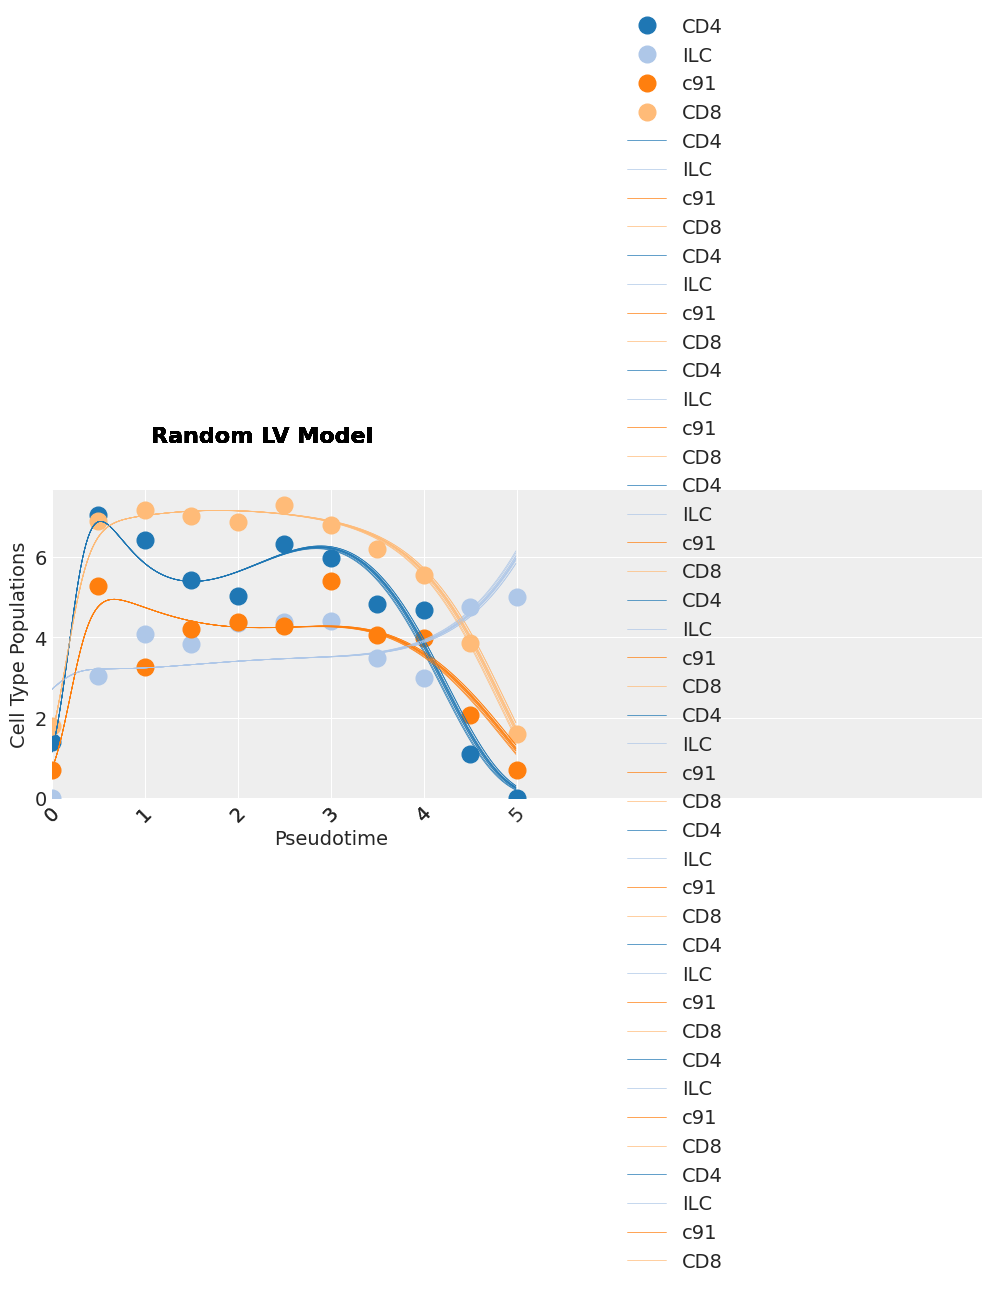

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))
plot_data_notitle(ax, f, lw = 0)

for i in range(10):
  r = theta2[:species]
  alpha = theta2[species:(species + pow(species, 2))]
  K = theta2[(species + pow(species, 2)):(2 * species + pow(species, 2))]
  X = theta2[-species:]
  X_means = []
  r_means = []
  K_means = []
  for i in range(species):
      X_means.append(X[i] + sds['X_' + str(i)] * 0.01 * np.random.normal(0, 0.1))
      r_means.append(r[i] + sds['r_' + str(i)] * 0.01 * np.random.normal(0, 0.1))
      K_means.append(K[i] + sds['K_' + str(i)] * 0.01 * np.random.normal(0, 0.1))

  alpha_means = []
  for i in range(species):
      alpha_means.append([])
      for j in range(species):
          alpha_means[i].append(alpha[species * i + j] + sds["alpha_" + str(i) + "_" + str(j)] * 0.01 * np.random.normal(0, 0.01))
  alpha_means = [item for sublist in alpha_means for item in sublist]
  theta = r_means + alpha_means + K_means + X_means
  x_y = odeint(func=lotka_volterra_random, y0= theta[-species:], t=time, args=(theta,))
  plot_model(ax, f, x_y, lw = 0.5, title="Random LV Model");

In [ ]:
params

['K_0',
 'K_1',
 'K_2',
 'K_3',
 'X_0',
 'X_1',
 'X_2',
 'X_3',
 'alpha_0_0',
 'alpha_0_1',
 'alpha_0_2',
 'alpha_0_3',
 'alpha_1_0',
 'alpha_1_1',
 'alpha_1_2',
 'alpha_1_3',
 'alpha_2_0',
 'alpha_2_1',
 'alpha_2_2',
 'alpha_2_3',
 'alpha_3_0',
 'alpha_3_1',
 'alpha_3_2',
 'alpha_3_3',
 'r_0',
 'r_1',
 'r_2',
 'r_3',
 'sigma']

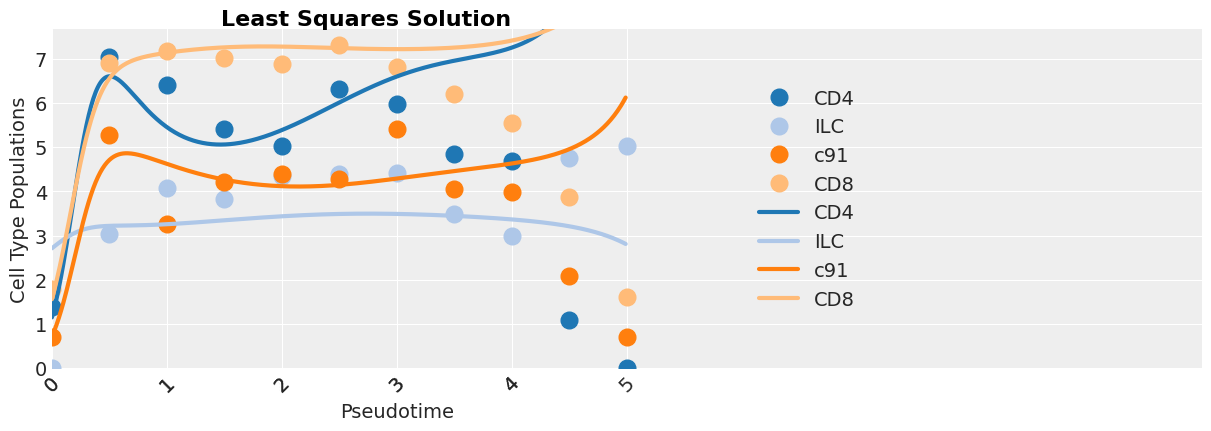

In [ ]:
def get_mean(param):
  return az.summary(trace).loc[param]['mean']
def get_sd(param):
  return az.summary(trace).loc[param]['sd']
X_means = []
r_means = []
K_means = []
for i in range(species):
    X_means.append(get_mean('X_' + str(i)))
    r_means.append(get_mean('r_' + str(i)))
    K_means.append(get_mean("K_" + str(i)))

alpha_means = []
for i in range(species):
    alpha_means.append([])
    for j in range(species):
        alpha_means[i].append(get_mean("alpha_" + str(i) + "_" + str(j)))
alpha_means = [item for sublist in alpha_means for item in sublist]
theta = r_means + alpha_means + K_means + X_means
x_y = odeint(func=lotka_volterra_random, y0= theta[-species:], t=time, args=(theta,))
f, ax = plt.subplots(figsize=(12, 4))
plot_model(ax, f, x_y, title="Least Squares Solution");

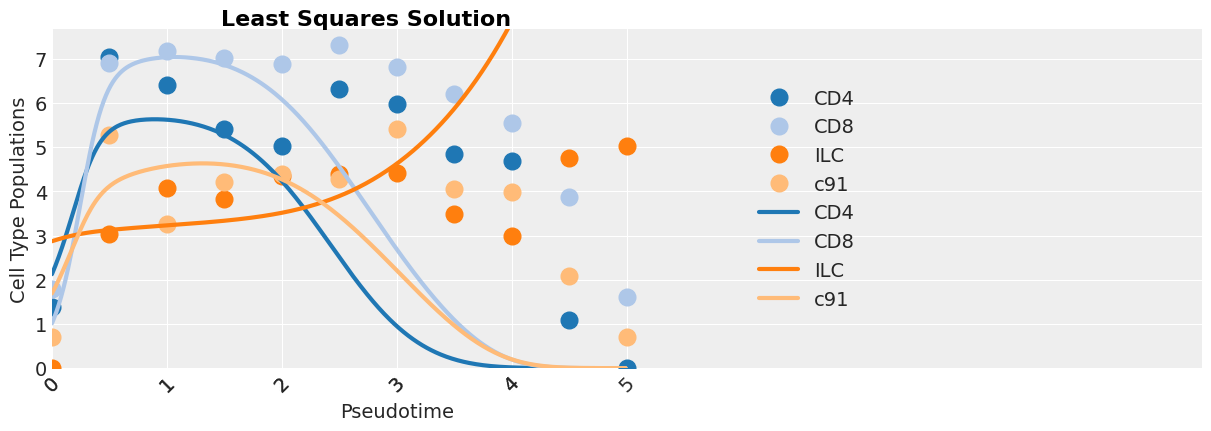

In [ ]:
def get_mean(param):
  return az.summary(trace).loc[param]['mean']
def get_sd(param):
  return az.summary(trace).loc[param]['sd']
X_means = []
r_means = []
K_means = []
for i in range(species):
    X_means.append(get_mean('X_' + str(i)) + get_sd('X_' + str(i)) * np.random.normal(0, 1))
    r_means.append(get_mean('r_' + str(i)) + get_sd('r_' + str(i)) * np.random.normal(0, 1))
    K_means.append(get_mean("K_" + str(i)) + get_sd('K_' + str(i)) * np.random.normal(0, 1))

alpha_means = []
for i in range(species):
    alpha_means.append([])
    for j in range(species):
        alpha_means[i].append(get_mean("alpha_" + str(i) + "_" + str(j)) + get_sd("alpha_" + str(i) + "_" + str(j)) * np.random.normal(0, 1))
alpha_means = [item for sublist in alpha_means for item in sublist]
theta = r_means + alpha_means + K_means + X_means
x_y = odeint(func=lotka_volterra_random, y0= theta[-species:], t=time, args=(theta,))
f, ax = plt.subplots(figsize=(12, 4))
plot_model(ax, f, x_y, title="Least Squares Solution");

In [ ]:
alpha

[[1.0000000752597493, 0.0015128627693879486, 0.0042570935950339145],
 [224.74175144458675, 0.9999995712018304, 275.10128763858916],
 [18.884089521488796, 9.969358235949413, 0.9999998892190384]]

In [ ]:
alpha

[array([1.00000009e+00, 2.55582111e-04, 1.61835588e-02]),
 array([226.16700252,   0.99999954, 278.30698253]),
 array([19.10721155, 10.18566531,  0.9999998 ])]

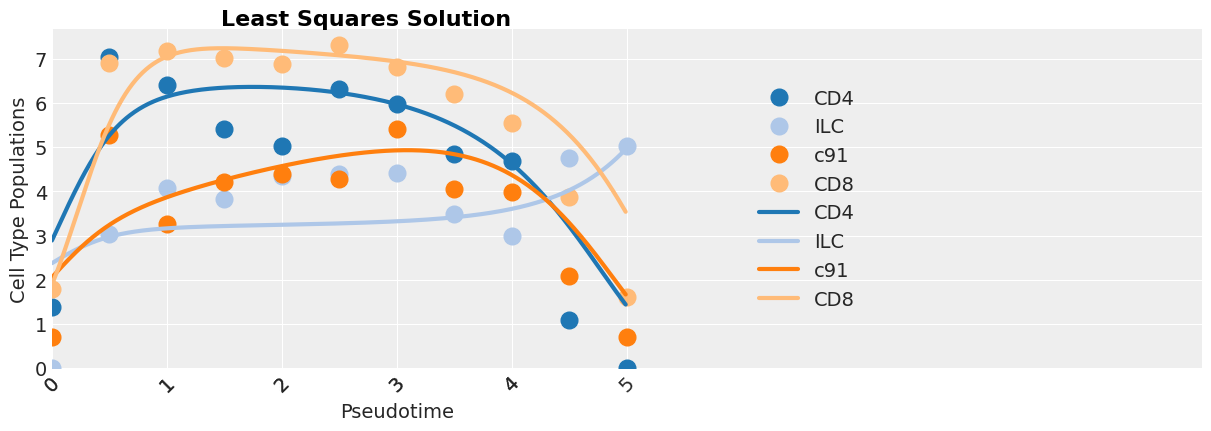

In [ ]:
def get_mean(param):
  return az.summary(trace).loc[param]['mean']
X_means = []
r_means = []
K_means = []
for i in range(species):
    X_means.append(get_mean('X_' + str(i)))
    r_means.append(get_mean('r_' + str(i)))
    K_means.append(get_mean("K_" + str(i)))

alpha_means = []
for i in range(species):
    alpha_means.append([])
    for j in range(species):
        alpha_means[i].append(get_mean("alpha_" + str(i) + "_" + str(j)))
alpha_means = [item for sublist in alpha_means for item in sublist]
theta = r_means + alpha_means + K_means + X_means
x_y = odeint(func=lotka_volterra_multi, y0= theta[-species:], t=time, args=(theta,))
f, ax = plt.subplots(figsize=(12, 4))
plot_model(ax, f, x_y, title="Least Squares Solution");

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor
import pytensor.tensor as pt

from numba import njit
from pymc.ode import DifferentialEquation
from pytensor.compile.ops import as_op
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import least_squares

species = 3
t = np.linspace(0, 10, 55)

@njit
def lotka_volterra_multi(X, t, r, alpha, K):
    dXdt = []
    for i in range(species):
        growth = r[i] * X[i] * (1 - (sum((alpha[i * species + j] * X[j]) for j in range(species)) / K[i]))
        dXdt.append(growth)
    return dXdt

@as_op(itypes=[pt.dvector], otypes=[pt.dmatrix])
def pytensor_forward_model_matrix(theta):
    return odeint(func=lotka_volterra_multi, y0=theta[-species:], t=t, args=(
    theta[:species], theta[species:(species + pow(species, 2))],
    theta[(species + pow(species, 2)):(2 * species + pow(species, 2))]))


X = [1, 1, 1]
r = [0.02, 0.02, 0.01, 0.01, 0.01, 0.4]
alpha = [[1, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.02, 1, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 1, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 1, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 1, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 1]]
alpha = [item for sublist in alpha for item in sublist]
K = [1000, 800, 200, 1, 1, 1500]
theta = r + alpha + K + X

# data = generate_synthetic_data([30, 3], t, [0.1, 0.2], [[1, 0.1], [0.2, 1]], [4600, 500])

with pm.Model() as model:
    X_prior = []
    r_prior = []
    K_prior = []
    for i in range(species):
        X_prior.append(pm.TruncatedNormal("X_" + str(i), mu=X[i], lower=0, sigma=100, initval=X[i]))
        r_prior.append(pm.TruncatedNormal("r_" + str(i), mu=r[i], lower=0, sigma=0.5, initval=r[i]))
        K_prior.append(pm.TruncatedNormal("K_" + str(i), mu=K[i], lower=0, sigma=300, initval=K[i]))

    alpha_prior = []
    for i in range(species):
        alpha_prior.append([])
        for j in range(species):
            if i == j:
                alpha_prior[i].append(pm.TruncatedNormal("alpha_" + str(i) + "_" + str(j), mu=alpha[i * species + j], lower=0, sigma=0.01,
                                                     initval=alpha[i * species + j]))
            else:
                alpha_prior[i].append(pm.TruncatedNormal("alpha_" + str(i) + "_" + str(j), mu=alpha[i * species + j], lower=0, sigma=0.5,
                                                     initval=alpha[i * species + j]))

    sigma = pm.HalfNormal("sigma", 10)

    flattened_alpha_prior = [item for sublist in alpha_prior for item in sublist]
    all_priors = r_prior + flattened_alpha_prior + K_prior + X_prior

    ode_solution = pytensor_forward_model_matrix(
        pm.math.stack(all_priors)
    )

    pm.Normal("Y_obs", mu=ode_solution, sigma=sigma, observed=data.iloc[:, :-1].values)

vars_list = list(model.values_to_rvs.keys())[:-1]

sampler = "Slice Sampler"
tune = draws = 200

with model:
    trace_slice = pm.sample(step=[pm.Slice(vars_list)], tune=tune, draws=draws)
trace = trace_slice
az.summary(trace)

KeyboardInterrupt: 

In [ ]:
model.debug()

point={'X_0_interval__': array(0.), 'r_0_interval__': array(-3.91202301), 'K_0_interval__': array(6.90775528), 'X_1_interval__': array(0.), 'r_1_interval__': array(-3.91202301), 'K_1_interval__': array(6.68461173), 'X_2_interval__': array(0.), 'r_2_interval__': array(-4.60517019), 'K_2_interval__': array(5.29831737), 'X_3_interval__': array(0.), 'r_3_interval__': array(-4.60517019), 'K_3_interval__': array(0.), 'X_4_interval__': array(0.), 'r_4_interval__': array(-4.60517019), 'K_4_interval__': array(0.), 'X_5_interval__': array(6.2146081), 'r_5_interval__': array(-0.91629073), 'K_5_interval__': array(7.31322039), 'alpha_0_0_interval__': array(0.), 'alpha_0_1_interval__': array(-4.60517019), 'alpha_0_2_interval__': array(-4.60517019), 'alpha_0_3_interval__': array(-4.60517019), 'alpha_0_4_interval__': array(-4.60517019), 'alpha_0_5_interval__': array(-4.60517019), 'alpha_1_0_interval__': array(-3.91202301), 'alpha_1_1_interval__': array(0.), 'alpha_1_2_interval__': array(-4.60517019), 

In [ ]:
r + alpha + K

[0.02, 0.01, 1, 0.01, 0.02, 1, 5000, 800]

In [ ]:
import pymc as pm
import pytensor.tensor as pt

# Define some dummy PyMC variables
with pm.Model() as model:
  a = pm.Normal("a", mu=0, sigma=1)
  b = pm.Normal("b", mu=1, sigma=1)
  c = pm.Normal("c", mu=2, sigma=1)

# Stack the variables into a single tensor
  stacked_tensor = pm.math.stack([a, b, c])

  print(stacked_tensor)

MakeVector{dtype='float64'}.0


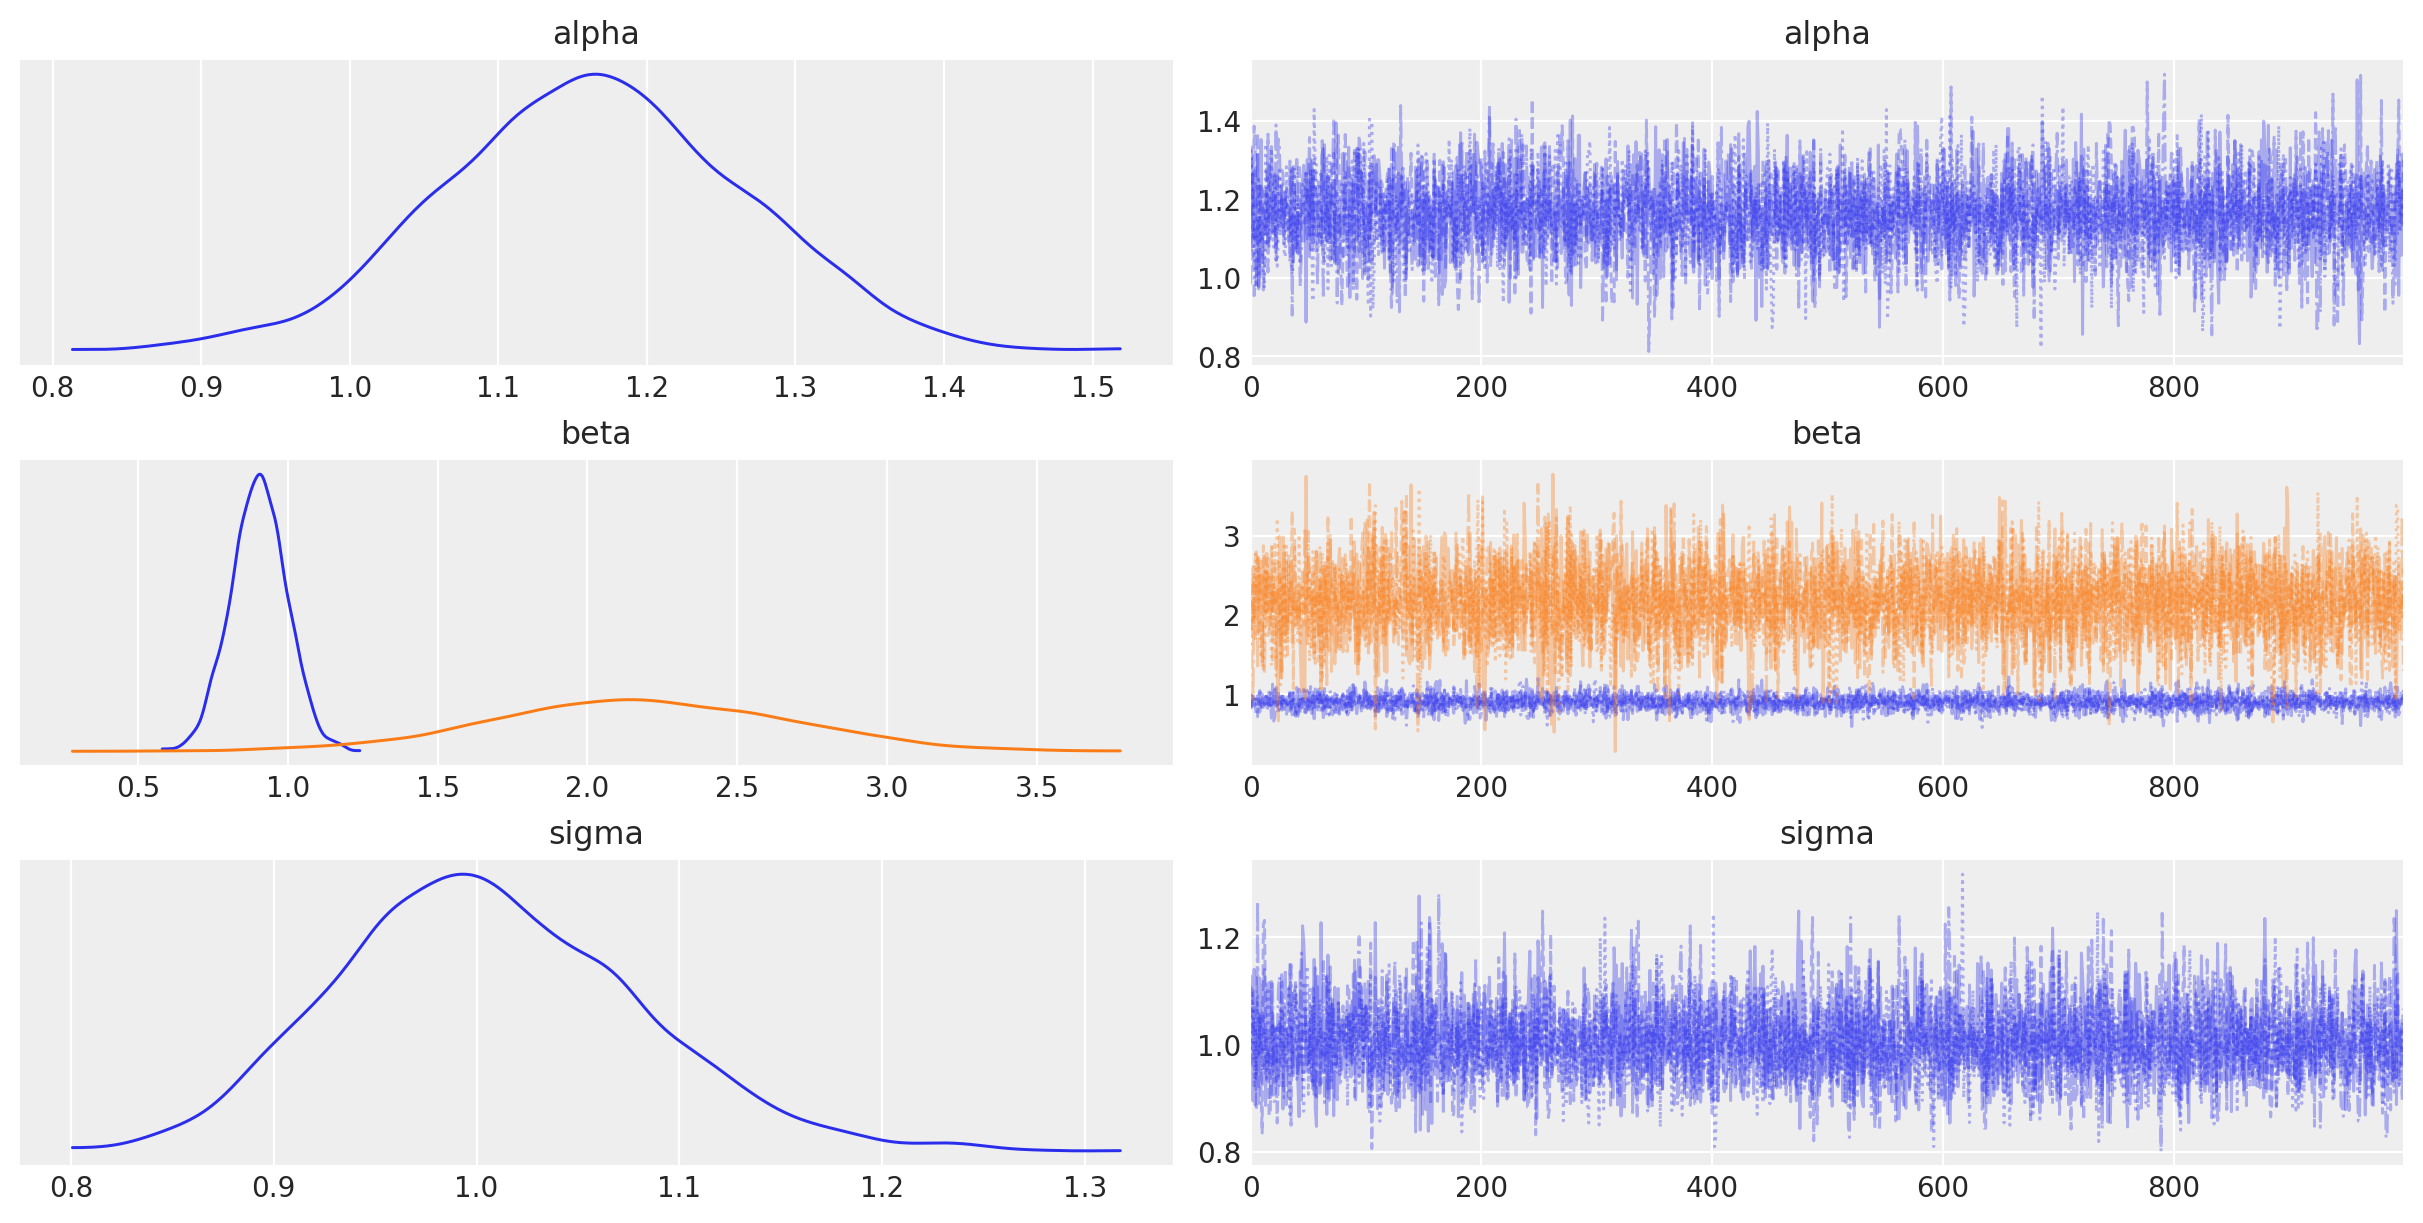

In [ ]:
az.plot_trace(idata, combined=True);

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters

def lotka_volterra(t, y, a, b, c, d):
    x, y = y
    dxdt = a * x - b * x * y
    dydt = -c * y + d * x * y
    return [dxdt, dydt]

def generate_data(params, t):
    sol = solve_ivp(lotka_volterra, [t[0], t[-1]], [90, 1], args=(params['a'], params['b'], params['c'], params['d']), t_eval=t)
    return sol.y.T

def objective(params, t, data):
    model = generate_data(params, t)
    return (model - data).ravel()

t = np.linspace(0,2, 20)

data = np.array(pd.DataFrame({species_list[i] : table.iloc[pos] for i, pos in enumerate([0, 3])}))

params = Parameters()
params.add('a', value=7, min=0, max=7)
params.add('b', value=0.01, min=0, max=5)
params.add('c', value=0.6, min=0, max=5)
params.add('d', value=0.005, min=0, max=5)

result = minimize(objective, params, args=(t, data))

for name, param in result.params.items():
    print(f'{name}: {param.value:.4f}')

a = result.params['a'].value
b = result.params['b'].value
c = result.params['c'].value
d = result.params['d'].value


plt.figure(figsize=(10, 5))
plt.plot(t, data[:, 0], 'b.', label='T Data')
plt.plot(t, data[:, 1], 'r.', label='Epi Data')

fitted_data = generate_data(result.params, t)
plt.plot(t, fitted_data[:, 0], 'b-', label='Fitted Prey')
plt.plot(t, fitted_data[:, 1], 'r-', label='Fitted Predator')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def predator_prey(y, t, alpha, beta, gamma, delta):
    x, y = y
    dxdt = alpha*x - beta*x*y
    dydt = delta*x*y - gamma*y
    return [dxdt, dydt]

x0 = 90.
y0 = 1.

t = np.linspace(0,10, 1000)

sol = odeint(predator_prey, [x0, y0], t, args=(a,b,c,d))
prey = sol[:, 0]
predators = sol[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(t, prey, label='T')
plt.plot(t, predators, label='Epi')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


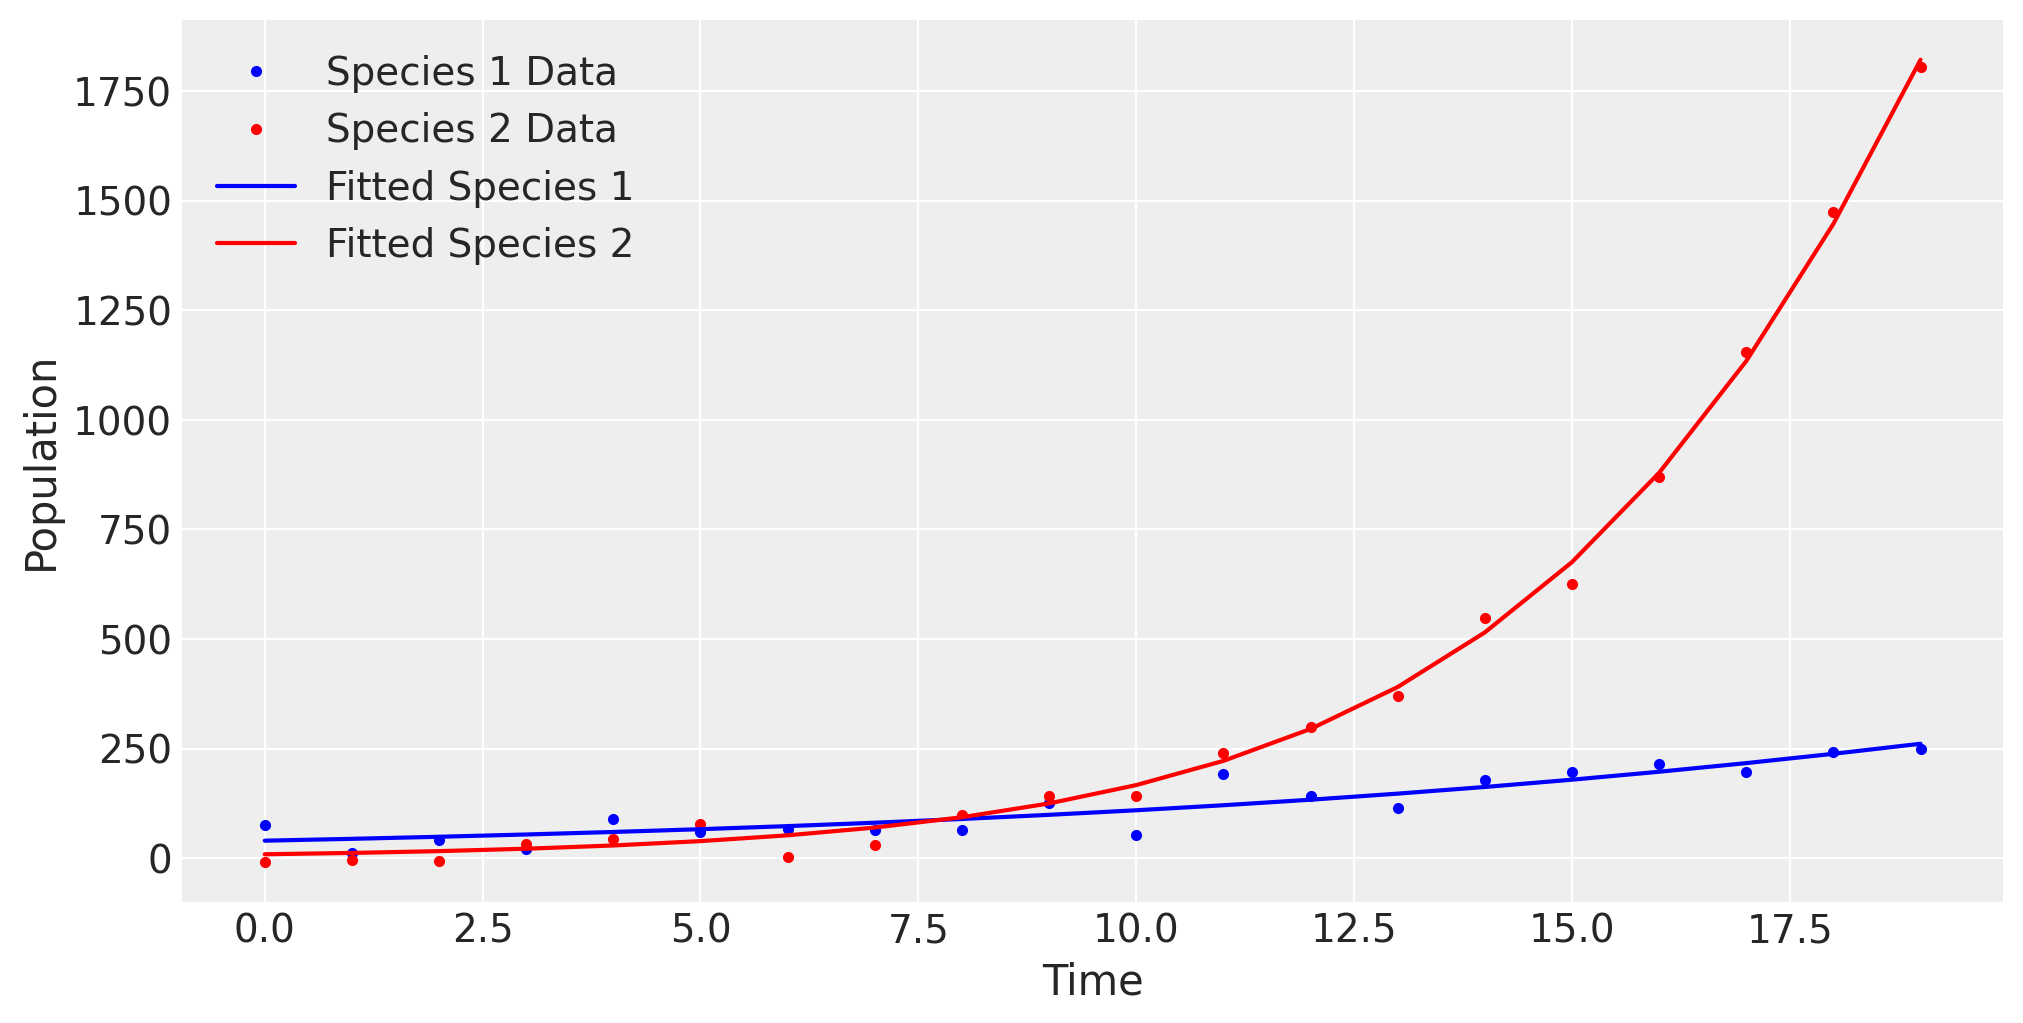

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters
import pandas as pd

def lotka_volterra_multi(t, X, r, alpha, K, species_list):
    dXdt = []
    for i, species_i in enumerate(species_list):
        growth = r[species_i] * X[i] * (1 - ((X[i] + (sum((alpha[species_i][species_j] * X[j]) for j, species_j in enumerate(species_list) if i != j))) / K[species_i]))
        dXdt.append(growth)
    return dXdt

def generate_alpha_dict(params, species_list):
    alpha = {}
    for i, species_i in enumerate(species_list):
        alpha[species_i] = {}
        for j, species_j in enumerate(species_list):
            if i != j:
                alpha_value = params[f'alpha_{species_i}_{species_j}'].value
                alpha[species_i][species_j] = alpha_value
    return alpha

def generate_data_multi(params, t, species_list):
    r = {species: params[f'r_{species}'].value for species in species_list}
    K = {species: params[f'K_{species}'].value for species in species_list}

    alpha = generate_alpha_dict(params, species_list)
    #change
    initial_conditions = [40, 9]
    sol = solve_ivp(lotka_volterra_multi, [t[0], t[-1]], initial_conditions,
                    args=(r, alpha, K, species_list), t_eval=t)
    return sol.y.T

def generate_synthetic_data(params, t, species_list, noise_level=30):
    r = {species: params[f'r_{species}'].value for species in species_list}
    K = {species: params[f'K_{species}'].value for species in species_list}

    alpha = generate_alpha_dict(params, species_list)
    #change
    initial_conditions = [40, 9]
    sol = solve_ivp(lotka_volterra_multi, [t[0], t[-1]], initial_conditions,
                    args=(r, alpha, K, species_list), t_eval=t)
    data = sol.y.T + noise_level * np.random.normal(size=sol.y.T.shape)
    return data

def objective_multi(params, t, data, species_list):
    model = generate_data_multi(params, t, species_list)
    return (model - data).ravel()

def initialize_params(species_list, growths, capacities, affectings):
    params = Parameters()

    for i, species in enumerate(species_list):
        params.add(f'r_{species}', value=growths[i], min=0, max=5)
        params.add(f'K_{species}', value=capacities[i], min=0, max=20000)

    count = 0
    for i, species_i in enumerate(species_list):
        for j, species_j in enumerate(species_list):
            if i != j:
                params.add(f'alpha_{species_i}_{species_j}', value=affectings[count], min=0, max=1)
                count += 1
    return params

#change
t = np.linspace(0, 19, 20)
species_list = ['s1', 's2']
# species_list = np.array(table.index[[0, 3]])
params = initialize_params(species_list, [0.2, 0.2], [8000, 5000], [0.02, 0.01])
data = generate_synthetic_data(initialize_params(species_list, [0.1, 0.3], [8000, 5000], [0.02, 0.01]), t, species_list)
# np.array(pd.DataFrame({species_list[i] : table.iloc[pos] for i, pos in enumerate([0, 3])}))

#change


result = minimize(objective_multi, params, args=(t, data, species_list))

r_optimized = {species: result.params[f'r_{species}'].value for species in species_list}
K_optimized = {species: result.params[f'K_{species}'].value for species in species_list}
alpha_optimized = generate_alpha_dict(result.params, species_list)

plt.figure(figsize=(10, 5))
plt.plot(t, data[:, 0], 'b.', label='Species 1 Data')
plt.plot(t, data[:, 1], 'r.', label='Species 2 Data')

fitted_data = generate_data_multi(result.params, t, species_list)
plt.plot(t, fitted_data[:, 0], 'b-', label='Fitted Species 1')
plt.plot(t, fitted_data[:, 1], 'r-', label='Fitted Species 2')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()


In [ ]:
alpha_optimized

In [ ]:
r_optimized

In [ ]:
K_optimized

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the Lotka-Volterra equations for multiple species
def lotka_volterra_multi(X, t, r, alpha, K, species_list):
    dXdt = []
    for i, species_i in enumerate(species_list):
        growth = r[species_i] * X[i] * (1 - ((X[i] + (sum((alpha[species_i][species_j] * X[j]) for j, species_j in enumerate(species_list) if i != j))) / K[species_i]))
        dXdt.append(growth)
    return dXdt

# Initial populations
X0 = [90, 0]

# Time points
t = np.linspace(0, 200, 1000)

# Solve ODE
result = odeint(lotka_volterra_multi, X0, t, args=(r_optimized, alpha_optimized, K_optimized, species_list))

# Convert result back to a dictionary
result_dict = {species: result[:, i] for i, species in enumerate(species_list)}

# Plot results
plt.figure(figsize=(10, 6))
for species, population in result_dict.items():
    plt.plot(t, population, label=species)
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Lotka-Volterra Simulation of Cell Competition')
plt.show()


In [ ]:
r_optimized

In [ ]:
alpha_optimized

In [ ]:
K_optimized

In [ ]:
def lotka_volterra_multi(t, X, r, alpha, K, species_list):
    dXdt = []
    for i, species_i in enumerate(species_list):
        growth = r[species_i] * X[i] * (1 - sum(alpha[species_i][species_j] * X[j] / K[species_i] for j, species_j in enumerate(species_list) if i != j))
        dXdt.append(growth)
    return dXdt
X0 = lotka_volterra_multi(t, X0, r_optimized, alpha_optimized, K_optimized, species_list)
lotka_volterra_multi(t, X0, r_optimized, alpha_optimized, K_optimized, species_list)

In [ ]:
sc.tl.umap(adata1, n_components=3)

In [ ]:
color = dict(zip(range(15), plt.cm.tab20(range(15))))

In [ ]:
umap = adata1.obsm['X_umap']
umap

In [ ]:
!mkdir figs

In [ ]:
for i in[30, 60, 120, 150, 210, 240]:
  fig = plt.figure(figsize = (10,10))
  ax = fig.add_subplot(projection = '3d')
  ax.scatter(umap[:,0], umap[:,1], umap[:,2], c = adata1.obs.leiden.astype('int').map(color))
  x_center = (umap[:,0].max() + umap[:,0].min())/2
  y_center = (umap[:,1].max() + umap[:,1].min())/2
  z_center = (umap[:,2].max() + umap[:,2].min())/2

  ax.plot([x_center,x_center], [y_center, y_center], [umap[:,2].min() - 2, umap[:,2].max() + 2], c = 'k', lw = 5)
  ax.plot([x_center,x_center], [umap[:,1].min() - 2, umap[:,1].max() + 2], [z_center, z_center], c = 'k', lw = 5)
  ax.plot([umap[:,0].min() - 2, umap[:,0].max() + 2], [y_center, y_center], [z_center, z_center], c = 'k', lw = 5)
  ax.view_init (20, i)
  ax.axis('off')
  plt.savefig(f'figs/{i:003}.png', dpi = 100, facecolor = 'white')
  plt.show()

In [ ]:
!